# Forcasting Performace of Sector Specific Portfolio's, Individual Stocks & S&P 500 Index 

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
import warnings
warnings.filterwarnings('ignore')
from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes for last year.
start = pd.Timestamp("2020-07-1", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-07-1", tz="America/New_York").isoformat()

# Set the ticker information=
tickers = ["TSLA","LCID","F","MSFT","GOOG","NVDA","META","RBLX","AAPL"]

# Get 3 year's worth of historical price data
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start,
    end=end
).df


# Display sample data
df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-07-01 04:00:00+00:00,365.12,367.36,363.91,364.11,27684309,317158,365.704401,AAPL
2020-07-02 04:00:00+00:00,367.85,370.47,363.64,364.11,28510542,304462,367.043939,AAPL
2020-07-06 04:00:00+00:00,370.00,375.78,369.87,373.85,29663966,335178,373.406953,AAPL
2020-07-07 04:00:00+00:00,375.41,378.62,372.23,372.69,28106823,312187,375.707017,AAPL
2020-07-08 04:00:00+00:00,376.72,381.50,376.36,381.37,29274427,328596,379.539909,AAPL


## Elecric Vehicle Porfolio Forcast

In [5]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes for last year.
start = pd.Timestamp("2020-07-1", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-07-1", tz="America/New_York").isoformat()

# Set the ticker information=
tickers = ["TSLA","LCID","F"]

# Get 3 year's worth of historical price data
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
ev_df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start,
    end=end
).df


# Display sample data
ev_df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-07-01 04:00:00+00:00,6.10,6.18,5.95,5.98,62454691,99176,6.020525,F
2020-07-02 04:00:00+00:00,6.10,6.17,6.00,6.05,67270506,104441,6.084685,F
2020-07-06 04:00:00+00:00,6.14,6.20,6.11,6.19,63921782,102258,6.160160,F
2020-07-07 04:00:00+00:00,6.14,6.20,6.09,6.12,56651981,87902,6.142349,F
2020-07-08 04:00:00+00:00,6.13,6.18,6.05,6.09,60928747,86125,6.093580,F


In [6]:
# Reorganize the DataFrame
# Separate ticker data
TSLA = ev_df_ticker[ev_df_ticker["symbol"]=="TSLA"].drop("symbol", axis=1)
LCID = ev_df_ticker[ev_df_ticker["symbol"]=="LCID"].drop("symbol", axis=1)
F = ev_df_ticker[ev_df_ticker["symbol"]=="F"].drop("symbol", axis=1)

# Concatenate the EV ticker DataFrames
ev_df_ticker = pd.concat([TSLA, LCID, F], axis=1, keys=["TSLA","LCID","F"])

# Display sample data
ev_df_ticker.head()

TSLA                                        \
                              open     high       low    close    volume   
timestamp                                                                  
2020-07-01 04:00:00+00:00  1083.00  1135.33  1080.500  1119.63  13326897   
2020-07-02 04:00:00+00:00  1221.48  1228.00  1185.600  1208.66  17250115   
2020-07-06 04:00:00+00:00  1276.69  1377.79  1266.044  1371.58  20569934   
2020-07-07 04:00:00+00:00  1405.01  1429.50  1336.710  1389.86  21490420   
2020-07-08 04:00:00+00:00  1405.00  1417.26  1311.340  1365.88  16316228   

                                                   LCID           ...         \
                          trade_count         vwap open high low  ... volume   
timestamp                                                         ...          
2020-07-01 04:00:00+00:00      331230  1117.340944  NaN  NaN NaN  ...    NaN   
2020-07-02 04:00:00+00:00      443895  1207.348675  NaN  NaN NaN  ...    NaN   
2020-07-06 04:00:00+00:00      595340  1323.913026  NaN  NaN NaN  ...    NaN   
2020-07-07 04:00:00+00:00      695480  1390.278353  NaN  NaN NaN  ...    NaN   
2020-07-08 04:00:00+00:00      483788  1375.578410  NaN  NaN NaN  ...    NaN   

                                               F                              \
                          trade_count vwap  open  high   low close    volume   
timestamp                                                                      
2020-07-01 04:00:00+00:00         NaN  NaN  6.10  6.18  5.95  5.98  62454691   
2020-07-02 04:00:00+00:00         NaN  NaN  6.10  6.17  6.00  6.05  67270506   
2020-07-06 04:00:00+00:00         NaN  NaN  6.14  6.20  6.11  6.19  63921782   
2020-07-07 04:00:00+00:00         NaN  NaN  6.14  6.20  6.09  6.12  56651981   
2020-07-08 04:00:00+00:00         NaN  NaN  6.13  6.18  6.05  6.09  60928747   

                                                 
                          trade_count      vwap  
timestamp                                        
2020-07-01 04:00:00+00:00       99176  6.020525  
2020-07-02 04:00:00+00:00      104441  6.084685  
2020-07-06 04:00:00+00:00      102258  6.160160  
2020-07-07 04:00:00+00:00       87902  6.142349  
2020-07-08 04:00:00+00:00       86125  6.093580  

[5 rows x 21 columns]

In [7]:
# Configure a Monte Carlo simulation for EV Portfolio to forecast five years cumulative returns
EV_MC_even_dist = MCSimulation(
    portfolio_data = ev_df_ticker,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
EV_MC_even_dist.portfolio_data

TSLA                                           \
                                open       high       low    close     volume   
timestamp                                                                       
2020-07-01 04:00:00+00:00  1083.0000  1135.3300  1080.500  1119.63   13326897   
2020-07-02 04:00:00+00:00  1221.4800  1228.0000  1185.600  1208.66   17250115   
2020-07-06 04:00:00+00:00  1276.6900  1377.7900  1266.044  1371.58   20569934   
2020-07-07 04:00:00+00:00  1405.0100  1429.5000  1336.710  1389.86   21490420   
2020-07-08 04:00:00+00:00  1405.0000  1417.2600  1311.340  1365.88   16316228   
...                              ...        ...       ...      ...        ...   
2023-06-26 04:00:00+00:00   250.0650   258.3700   240.700   241.05  180512631   
2023-06-27 04:00:00+00:00   243.2400   250.3899   240.850   250.21  165479866   
2023-06-28 04:00:00+00:00   249.6835   259.8800   248.890   256.24  160049457   
2023-06-29 04:00:00+00:00   258.0300   260.7400   253.610   257.50  131283360   
2023-06-30 04:00:00+00:00   260.6000   264.4500   259.890   261.77  108497076   

                                                                  LCID        \
                          trade_count         vwap daily_return   open  high   
timestamp                                                                      
2020-07-01 04:00:00+00:00      331230  1117.340944          NaN    NaN   NaN   
2020-07-02 04:00:00+00:00      443895  1207.348675     0.079517    NaN   NaN   
2020-07-06 04:00:00+00:00      595340  1323.913026     0.134794    NaN   NaN   
2020-07-07 04:00:00+00:00      695480  1390.278353     0.013328    NaN   NaN   
2020-07-08 04:00:00+00:00      483788  1375.578410    -0.017254    NaN   NaN   
...                               ...          ...          ...    ...   ...   
2023-06-26 04:00:00+00:00     1945202   248.448658    -0.060417  6.010  6.28   
2023-06-27 04:00:00+00:00     1627710   246.086344     0.038000  5.790  6.15   
2023-06-28 04:00:00+00:00     1548094   255.824063     0.024100  6.090  6.54   
2023-06-29 04:00:00+00:00     1320690   256.882461     0.004917  6.475  6.94   
2023-06-30 04:00:00+00:00     1178980   262.773158     0.016583  7.020  7.18   

                           ...                             F                 \
                           ...      vwap daily_return   open    high    low   
timestamp                  ...                                                
2020-07-01 04:00:00+00:00  ...       NaN          NaN   6.10   6.180   5.95   
2020-07-02 04:00:00+00:00  ...       NaN          NaN   6.10   6.170   6.00   
2020-07-06 04:00:00+00:00  ...       NaN          NaN   6.14   6.200   6.11   
2020-07-07 04:00:00+00:00  ...       NaN          NaN   6.14   6.200   6.09   
2020-07-08 04:00:00+00:00  ...       NaN          NaN   6.13   6.180   6.05   
...                        ...       ...          ...    ...     ...    ...   
2023-06-26 04:00:00+00:00  ...  5.930726     0.013699  14.01  14.230  13.99   
2023-06-27 04:00:00+00:00  ...  5.871815     0.099099  14.19  14.455  14.06   
2023-06-28 04:00:00+00:00  ...  6.367721     0.052459  14.39  14.790  14.37   
2023-06-29 04:00:00+00:00  ...  6.778238     0.071651  14.87  15.130  14.79   
2023-06-30 04:00:00+00:00  ...  6.974919     0.001453  15.05  15.230  14.96   

                                                                                
                           close    volume trade_count       vwap daily_return  
timestamp                                                                       
2020-07-01 04:00:00+00:00   5.98  62454691       99176   6.020525          NaN  
2020-07-02 04:00:00+00:00   6.05  67270506      104441   6.084685     0.011706  
2020-07-06 04:00:00+00:00   6.19  63921782      102258   6.160160     0.023140  
2020-07-07 04:00:00+00:00   6.12  56651981       87902   6.142349    -0.011309  
2020-07-08 04:00:00+00:00   6.09  60928747       86125   6.093580    -0.004902  
...                  

In [8]:
# Run a Monte Carlo simulation to forecast five years cumulative returns for EV portfolio
EV_MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017666,0.962479,0.981758,1.021073,0.958365,1.005843,0.970524,0.999736,1.039724,0.962366,...,1.004230,0.975541,0.991983,0.973594,0.979604,0.998503,1.028021,0.944713,1.027678,0.961131
2,1.038861,0.990453,0.963688,0.965906,0.982654,1.004066,0.989450,0.949612,1.073441,0.978145,...,0.985479,0.994439,0.969960,0.989440,0.983873,0.986743,1.034056,0.903878,1.033027,0.934895
3,1.062206,0.981167,0.952144,0.913329,1.005575,0.960228,0.976863,0.932575,1.093393,1.005280,...,1.027171,0.997605,0.940140,1.034384,1.032029,1.015260,1.013002,0.954464,1.076290,0.929658
4,1.077667,1.046819,0.935969,0.870793,0.990413,0.929985,0.987619,0.952805,1.157579,1.053577,...,1.002062,0.999007,0.951501,1.003694,1.046914,1.022598,1.038714,0.896193,1.025827,0.895216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,5.182123,0.501357,0.719079,5.355561,0.803970,1.172895,2.830448,3.251936,1.917821,2.686979,...,1.279588,0.511357,2.485341,2.116568,0.350604,1.490456,6.749117,2.489931,3.316527,0.771558
1257,5.255027,0.512643,0.725760,5.244566,0.783294,1.220034,2.839364,3.160188,1.815173,2.755357,...,1.347222,0.507347,2.495139,2.165992,0.353212,1.457145,6.554727,2.544441,3.374687,0.766705
1258,5.442979,0.507829,0.733417,5.184684,0.791894,1.216806,2.794156,3.106137,1.821480,2.645598,...,1.308666,0.533021,2.577780,2.241512,0.350094,1.459220,6.807434,2.591825,3.395470,0.781388
1259,5.456534,0.490174,0.727126,5.093540,0.752888,1.180912,2.759270,3.018425,1.873233,2.750999,...,1.309943,0.559225,2.596136,2.288027,0.360088,1.509970,6.901486,2.647716,3.270293,0.775550


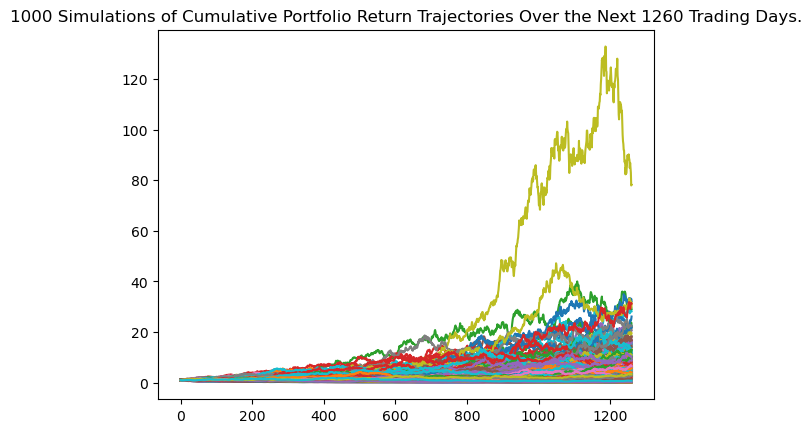

In [9]:
# Plot simulation outcomes for EV portfolio
ev_line_plot = EV_MC_even_dist.plot_simulation()


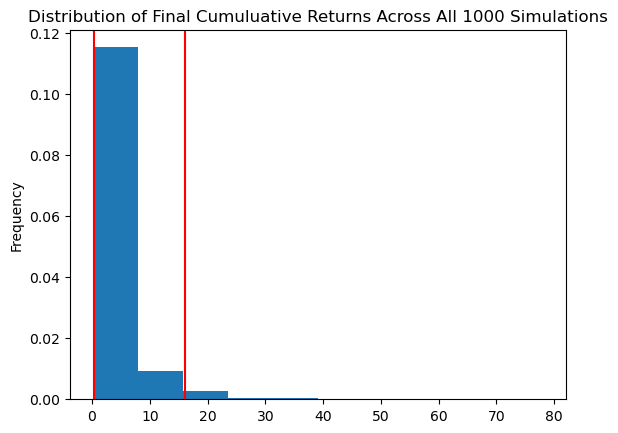

In [10]:
# Plot probability distribution and confidence intervals for EV portfolio
ev_dist_plot = EV_MC_even_dist.plot_distribution()

In [162]:
# Fetch summary statistics for EV portfolio from the Monte Carlo simulation results
ev_tbl = EV_MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(ev_tbl)

count           1000.000000
mean               3.622674
std                4.698154
min                0.132971
25%                1.207801
50%                2.273977
75%                4.235103
max               78.196618
95% CI Lower       0.334738
95% CI Upper      16.025704
Name: 1260, dtype: float64


In [163]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments EV in stocks
ev_ci_lower = round(ev_tbl[8]*10000,2)
ev_ci_upper = round(ev_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the EV portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ev_ci_lower} and ${ev_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the EV portfolio over the next 5 years will end within in the range of $3347.38 and $160257.04.


## Artificial Intelligence Portfolio Forcast

In [13]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes for last year.
start = pd.Timestamp("2020-07-1", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-07-1", tz="America/New_York").isoformat()

# Set the ticker information=
tickers = ["MSFT","GOOG","NVDA"]

# Get 3 year's worth of historical price data
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
ai_df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start,
    end=end
).df


# Display sample data
ai_df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-07-01 04:00:00+00:00,1411.10,1443.0000,1409.82,1438.04,1775167,63632,1431.615264,GOOG
2020-07-02 04:00:00+00:00,1446.94,1482.9500,1446.42,1464.70,1859480,66404,1464.743755,GOOG
2020-07-06 04:00:00+00:00,1480.06,1506.5900,1472.86,1495.70,1563997,56188,1492.376734,GOOG
2020-07-07 04:00:00+00:00,1490.00,1516.8000,1483.55,1485.18,1458215,49010,1500.388846,GOOG
2020-07-08 04:00:00+00:00,1494.32,1505.8799,1485.63,1496.00,1249676,41006,1496.021168,GOOG


In [14]:
# Reorganize the DataFrame
# Separate ticker data

MSFT = ai_df_ticker[ai_df_ticker["symbol"]=="MSFT"].drop("symbol", axis=1)
GOOG = ai_df_ticker[ai_df_ticker["symbol"]=="GOOG"].drop("symbol", axis=1)
NVDA = ai_df_ticker[ai_df_ticker["symbol"]=="NVDA"].drop("symbol", axis=1)




# Concatenate the ticker DataFrames
ai_df_ticker = pd.concat([ MSFT, GOOG, NVDA], axis=1, keys=["MSFT","GOOG","NVDA"])

# Display sample data
ai_df_ticker.head()

MSFT                                    \
                               open    high     low   close    volume   
timestamp                                                               
2020-07-01 04:00:00+00:00  203.1400  206.35  201.77  204.70  32061207   
2020-07-02 04:00:00+00:00  205.6800  208.02  205.00  206.26  29315762   
2020-07-06 04:00:00+00:00  208.8335  211.13  208.09  210.70  31899713   
2020-07-07 04:00:00+00:00  210.4500  214.67  207.99  208.25  33601389   
2020-07-08 04:00:00+00:00  210.0700  213.26  208.69  212.83  33601710   

                                                      GOOG             \
                          trade_count        vwap     open       high   
timestamp                                                               
2020-07-01 04:00:00+00:00      294021  204.576604  1411.10  1443.0000   
2020-07-02 04:00:00+00:00      272179  206.951347  1446.94  1482.9500   
2020-07-06 04:00:00+00:00      310510  210.136861  1480.06  1506.5900   
2020-07-07 04:00:00+00:00      335835  211.293027  1490.00  1516.8000   
2020-07-08 04:00:00+00:00      308117  211.519483  1494.32  1505.8799   

                                    ...                                    \
                               low  ...   volume trade_count         vwap   
timestamp                           ...                                     
2020-07-01 04:00:00+00:00  1409.82  ...  1775167       63632  1431.615264   
2020-07-02 04:00:00+00:00  1446.42  ...  1859480       66404  1464.743755   
2020-07-06 04:00:00+00:00  1472.86  ...  1563997       56188  1492.376734   
2020-07-07 04:00:00+00:00  1483.55  ...  1458215       49010  1500.388846   
2020-07-08 04:00:00+00:00  1485.63  ...  1249676       41006  1496.021168   

                             NVDA                                     \
                             open      high     low   close   volume   
timestamp                                                              
2020-07-01 04:00:00+00:00  380.83  383.0269  376.52  381.20  8166170   
2020-07-02 04:00:00+00:00  385.56  389.5000  383.13  384.49  9101352   
2020-07-06 04:00:00+00:00  389.00  396.3500  388.50  393.57  7897343   
2020-07-07 04:00:00+00:00  397.85  402.8000  394.03  394.87  8945030   
2020-07-08 04:00:00+00:00  399.75  409.0000  398.62  408.64  9137055   

                                                   
                          trade_count        vwap  
timestamp                                          
2020-07-01 04:00:00+00:00      110086  380.698367  
2020-07-02 04:00:00+00:00      109997  386.332902  
2020-07-06 04:00:00+00:00      113781  392.785480  
2020-07-07 04:00:00+00:00      133289  398.830634  
2020-07-08 04:00:00+00:00      132469  404.000408  

[5 rows x 21 columns]

In [15]:
# Configure a Monte Carlo simulation for AI Portfolio to forecast five years cumulative returns
AI_MC_even_dist = MCSimulation(
    portfolio_data = ai_df_ticker,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
AI_MC_even_dist.portfolio_data

MSFT                                    \
                               open    high     low   close    volume   
timestamp                                                               
2020-07-01 04:00:00+00:00  203.1400  206.35  201.77  204.70  32061207   
2020-07-02 04:00:00+00:00  205.6800  208.02  205.00  206.26  29315762   
2020-07-06 04:00:00+00:00  208.8335  211.13  208.09  210.70  31899713   
2020-07-07 04:00:00+00:00  210.4500  214.67  207.99  208.25  33601389   
2020-07-08 04:00:00+00:00  210.0700  213.26  208.69  212.83  33601710   
...                             ...     ...     ...     ...       ...   
2023-06-26 04:00:00+00:00  333.7200  336.11  328.49  328.60  21546739   
2023-06-27 04:00:00+00:00  331.8600  336.15  329.30  334.57  24391259   
2023-06-28 04:00:00+00:00  334.6600  337.98  333.81  335.85  20489414   
2023-06-29 04:00:00+00:00  334.7100  336.11  332.62  335.05  16997042   
2023-06-30 04:00:00+00:00  337.7500  342.73  337.20  340.41  20023705   

                                                                     GOOG  \
                          trade_count        vwap daily_return       open   
timestamp                                                                   
2020-07-01 04:00:00+00:00      294021  204.576604          NaN  1411.1000   
2020-07-02 04:00:00+00:00      272179  206.951347     0.007621  1446.9400   
2020-07-06 04:00:00+00:00      310510  210.136861     0.021526  1480.0600   
2020-07-07 04:00:00+00:00      335835  211.293027    -0.011628  1490.0000   
2020-07-08 04:00:00+00:00      308117  211.519483     0.021993  1494.3200   
...                               ...         ...          ...        ...   
2023-06-26 04:00:00+00:00      392416  330.891178    -0.019163   121.4656   
2023-06-27 04:00:00+00:00      345920  333.438745     0.018168   117.8400   
2023-06-28 04:00:00+00:00      327927  335.716899     0.003826   117.9600   
2023-06-29 04:00:00+00:00      276397  334.633442    -0.002382   120.0900   
2023-06-30 04:00:00+00:00      355841  340.677583     0.015998   121.1000   

                                      ...                              NVDA  \
                                high  ...         vwap daily_return    open   
timestamp                             ...                                     
2020-07-01 04:00:00+00:00  1443.0000  ...  1431.615264          NaN  380.83   
2020-07-02 04:00:00+00:00  1482.9500  ...  1464.743755     0.018539  385.56   
2020-07-06 04:00:00+00:00  1506.5900  ...  1492.376734     0.021165  389.00   
2020-07-07 04:00:00+00:00  1516.8000  ...  1500.388846    -0.007033  397.85   
2020-07-08 04:00:00+00:00  1505.8799  ...  1496.021168     0.007285  399.75   
...                              ...  ...          ...          ...     ...   
2023-06-26 04:00:00+00:00   122.7200  ...   120.214274    -0.031946  424.61   
2023-06-27 04:00:00+00:00   119.8950  ...   118.700725    -0.000672  407.99   
2023-06-28 04:00:00+00:00   121.2700  ...   120.294881     0.017393  406.80   
2023-06-29 04:00:00+00:00   120.9100  ...   119.992739    -0.008837  415.58   
2023-06-30 04:00:00+00:00   122.0300  ...   121.379810     0.007583  416.80   

                                                                           \
                               high     low   close    volume trade_count   
timestamp                                                                   
2020-07-01 04:00:00+00:00  383.0269  376.52  381.20   8166170      110086   
2020-07-02 04:00:00+00:00  389.5000  383.13  384.49   9101352      109997   
2020-07-06 04:00:00+00:00  396.3500  388.50  393.57   7897343      113781   
2020-07-07 04:00:00+00:00  402.8000  394.03  394.87   8945030      133289   
2020-07-08 04:00:00+00:00  409.0000  398.62  408.64   9137055      132469   
...                             ...     ...     ...       ...         ...   
2023-06-26 04:00:00+00:00  427.6400  401.00  406.32  59463824      800700   
2023-06-27 04:00:00+00:00  419.4000  404.48  418.76 

In [16]:
# Run a Monte Carlo simulation to forecast five years cumulative returns for AI portfolio
AI_MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003730,1.025277,0.941364,0.977644,0.966332,1.018612,1.001815,1.019266,0.965951,0.971700,...,1.003941,0.961251,0.987632,0.977844,0.996632,0.987971,1.006075,0.999594,0.996420,1.027379
2,1.017154,1.024121,0.967143,0.993142,0.982050,1.036461,1.006694,1.027401,0.961189,0.962322,...,0.994589,0.942129,0.999633,1.014263,1.008906,1.001453,1.002534,0.989954,0.981121,0.997300
3,1.016088,1.045493,0.968022,1.016485,1.005068,1.036425,0.956869,1.037284,0.966415,0.944541,...,0.996246,0.920584,0.977849,1.018434,0.969679,0.992649,1.010636,0.964573,1.008675,1.002645
4,1.018509,1.043955,0.968163,0.995963,1.033995,1.037875,0.952835,1.031115,0.991999,0.939077,...,1.003076,0.894009,0.995381,1.011738,0.993937,0.968556,0.994257,0.970981,1.007872,1.034946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.833715,4.727200,1.000338,2.371642,1.844210,0.550456,6.466051,1.478686,2.089037,0.749006,...,7.001945,0.671473,1.612115,3.102042,1.455133,3.408184,2.607374,3.620045,0.966763,1.485166
1257,4.788751,4.725165,0.994267,2.389370,1.824484,0.527473,6.489273,1.486871,2.109262,0.749420,...,6.875464,0.670320,1.617649,3.112876,1.428555,3.372361,2.598394,3.682678,0.999962,1.527540
1258,4.841644,4.583528,1.012273,2.303469,1.816995,0.524519,6.507353,1.505315,2.182112,0.767255,...,7.074958,0.679416,1.644382,3.159505,1.427562,3.430754,2.579705,3.576254,0.993795,1.492350
1259,4.867940,4.536033,1.002391,2.349811,1.806951,0.513550,6.679884,1.541545,2.180034,0.777181,...,7.029132,0.650256,1.617063,3.109356,1.402792,3.253899,2.535045,3.596091,0.978456,1.456072


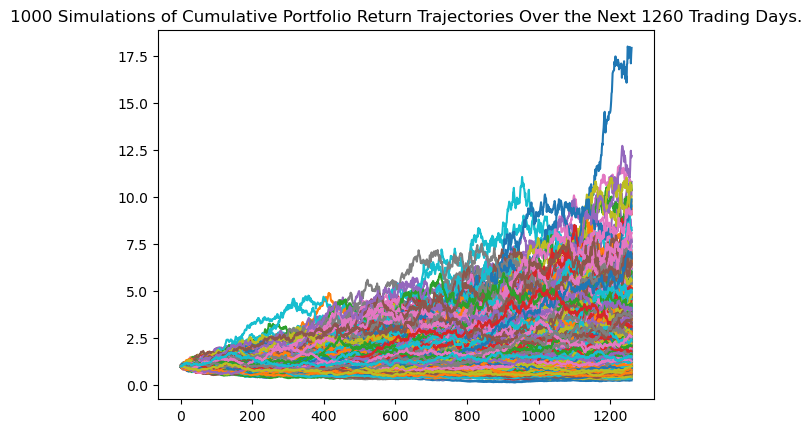

In [17]:
# Plot simulation outcomes for AI portfolio
ai_line_plot = AI_MC_even_dist.plot_simulation()


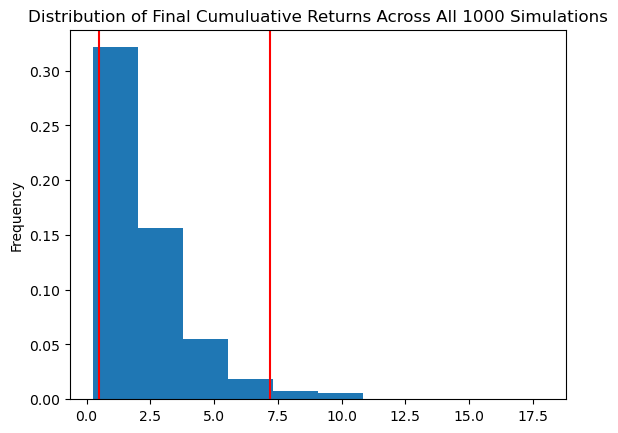

In [18]:
# Plot probability distribution and confidence intervals for AI portfolio
ai_dist_plot = AI_MC_even_dist.plot_distribution()

In [165]:
# Fetch summary statistics for EV portfolio from the Monte Carlo simulation results
ai_tbl = AI_MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(ai_tbl)

count           1000.000000
mean               2.300843
std                1.803817
min                0.245174
25%                1.083755
50%                1.789828
75%                2.926197
max               17.924160
95% CI Lower       0.484378
95% CI Upper       7.180625
Name: 1260, dtype: float64


In [166]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments EV in stocks
ai_ci_lower = round(ai_tbl[8]*10000,2)
ai_ci_upper = round(ai_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the AI portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ai_ci_lower} and ${ai_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the AI portfolio over the next 5 years will end within in the range of $4843.78 and $71806.25.


# Metaverse Portfolio Forcast 

In [173]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes for last year.
start = pd.Timestamp("2020-07-1", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-07-1", tz="America/New_York").isoformat()

# Set the ticker information=
tickers = ["META", "RBLX", "AAPL"]

# Get 3 year's worth of historical price data
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
mv_df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start,
    end=end
).df


# Display sample data
mv_df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-07-01 04:00:00+00:00,365.12,367.36,363.91,364.11,27684309,317158,365.704401,AAPL
2020-07-02 04:00:00+00:00,367.85,370.47,363.64,364.11,28510542,304462,367.043939,AAPL
2020-07-06 04:00:00+00:00,370.00,375.78,369.87,373.85,29663966,335178,373.406953,AAPL
2020-07-07 04:00:00+00:00,375.41,378.62,372.23,372.69,28106823,312187,375.707017,AAPL
2020-07-08 04:00:00+00:00,376.72,381.50,376.36,381.37,29274427,328596,379.539909,AAPL


In [174]:
# Reorganize the DataFrame
# Separate ticker data

META = mv_df_ticker[mv_df_ticker["symbol"]=="META"].drop("symbol", axis=1)
RBLX = mv_df_ticker[mv_df_ticker["symbol"]=="RBLX"].drop("symbol", axis=1)
AAPL = mv_df_ticker[mv_df_ticker["symbol"]=="AAPL"].drop("symbol", axis=1)




# Concatenate the ticker DataFrames
mv_df_ticker = pd.concat([ META, RBLX, AAPL], axis=1, keys=["META","RBLX","AAPL"])

# Display sample data
mv_df_ticker.tail()

META                                      \
                             open     high      low   close    volume   
timestamp                                                               
2023-06-26 04:00:00+00:00  288.70  289.790  277.600  278.47  24251346   
2023-06-27 04:00:00+00:00  282.01  289.345  280.655  287.05  26218199   
2023-06-28 04:00:00+00:00  284.82  289.550  284.060  285.29  16823649   
2023-06-29 04:00:00+00:00  284.50  286.570  280.690  281.53  15395487   
2023-06-30 04:00:00+00:00  284.76  289.050  284.415  286.99  16481698   

                                                    RBLX                 ...  \
                          trade_count        vwap   open    high    low  ...   
timestamp                                                                ...   
2023-06-26 04:00:00+00:00      321880  282.431492  37.63  39.425  37.59  ...   
2023-06-27 04:00:00+00:00      327877  285.597413  39.80  42.180  39.47  ...   
2023-06-28 04:00:00+00:00      248973  286.131385  41.80  42.990  39.86  ...   
2023-06-29 04:00:00+00:00      216270  282.819616  40.00  40.200  38.72  ...   
2023-06-30 04:00:00+00:00      254974  287.196080  39.88  41.385  39.78  ...   

                                                                 AAPL          \
                               volume trade_count       vwap     open    high   
timestamp                                                                       
2023-06-26 04:00:00+00:00   8864810.0     81265.0  38.874371  186.830  188.05   
2023-06-27 04:00:00+00:00  12002767.0    110363.0  41.365888  185.890  188.39   
2023-06-28 04:00:00+00:00  12272877.0    109539.0  41.218621  187.930  189.90   
2023-06-29 04:00:00+00:00   9838104.0     82885.0  39.159030  189.080  190.07   
2023-06-30 04:00:00+00:00  11109231.0    105768.0  40.589781  191.775  194.48   

                                                                             
                              low   close    volume trade_count        vwap  
timestamp                                                                    
2023-06-26 04:00:00+00:00  185.23  185.27  48174281      585785  186.327387  
2023-06-27 04:00:00+00:00  185.67  188.06  50781649      513088  187.500148  
2023-06-28 04:00:00+00:00  187.60  189.25  51239329      560503  188.892040  
2023-06-29 04:00:00+00:00  188.94  189.59  46347308      525367  189.556085  
2023-06-30 04:00:00+00:00  191.26  193.88  68445760      758835  192.898344  

[5 rows x 21 columns]

In [176]:
# Configure a Monte Carlo simulation for MV Portfolio to forecast five years cumulative returns
MV_MC_even_dist = MCSimulation(
    portfolio_data = mv_df_ticker,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
MV_MC_even_dist.portfolio_data

META                                      \
                             open     high      low   close    volume   
timestamp                                                               
2020-07-01 04:00:00+00:00  228.50  239.000  227.560  237.55  43400289   
2020-07-02 04:00:00+00:00  239.00  240.000  232.610  233.42  30633620   
2020-07-06 04:00:00+00:00  233.76  240.400  232.270  240.28  26208458   
2020-07-07 04:00:00+00:00  239.41  247.650  238.820  240.86  27887936   
2020-07-08 04:00:00+00:00  238.11  246.990  236.590  243.58  29792601   
...                           ...      ...      ...     ...       ...   
2023-06-26 04:00:00+00:00  288.70  289.790  277.600  278.47  24251346   
2023-06-27 04:00:00+00:00  282.01  289.345  280.655  287.05  26218199   
2023-06-28 04:00:00+00:00  284.82  289.550  284.060  285.29  16823649   
2023-06-29 04:00:00+00:00  284.50  286.570  280.690  281.53  15395487   
2023-06-30 04:00:00+00:00  284.76  289.050  284.415  286.99  16481698   

                                                                 RBLX          \
                          trade_count        vwap daily_return   open    high   
timestamp                                                                       
2020-07-01 04:00:00+00:00      400706  234.434059          NaN    NaN     NaN   
2020-07-02 04:00:00+00:00      298883  235.449576    -0.017386    NaN     NaN   
2020-07-06 04:00:00+00:00      256191  237.814047     0.029389    NaN     NaN   
2020-07-07 04:00:00+00:00      279309  243.701442     0.002414    NaN     NaN   
2020-07-08 04:00:00+00:00      290455  241.524051     0.011293    NaN     NaN   
...                               ...         ...          ...    ...     ...   
2023-06-26 04:00:00+00:00      321880  282.431492    -0.035535  37.63  39.425   
2023-06-27 04:00:00+00:00      327877  285.597413     0.030811  39.80  42.180   
2023-06-28 04:00:00+00:00      248973  286.131385    -0.006131  41.80  42.990   
2023-06-29 04:00:00+00:00      216270  282.819616    -0.013180  40.00  40.200   
2023-06-30 04:00:00+00:00      254974  287.196080     0.019394  39.88  41.385   

                           ...                             AAPL          \
                           ...       vwap daily_return     open    high   
timestamp                  ...                                            
2020-07-01 04:00:00+00:00  ...        NaN          NaN  365.120  367.36   
2020-07-02 04:00:00+00:00  ...        NaN          NaN  367.850  370.47   
2020-07-06 04:00:00+00:00  ...        NaN          NaN  370.000  375.78   
2020-07-07 04:00:00+00:00  ...        NaN          NaN  375.410  378.62   
2020-07-08 04:00:00+00:00  ...        NaN          NaN  376.720  381.50   
...                        ...        ...          ...      ...     ...   
2023-06-26 04:00:00+00:00  ...  38.874371     0.035931  186.830  188.05   
2023-06-27 04:00:00+00:00  ...  41.365888     0.066565  185.890  188.39   
2023-06-28 04:00:00+00:00  ...  41.218621    -0.043042  187.930  189.90   
2023-06-29 04:00:00+00:00  ...  39.159030    -0.031984  189.080  190.07   
2023-06-30 04:00:00+00:00  ...  40.589781     0.040268  191.775  194.48   

                                                                             \
                              low   close    volume trade_count        vwap   
timestamp                                                                     
2020-07-01 04:00:00+00:00  363.91  364.11  27684309      317158  365.704401   
2020-07-02 04:00:00+00:00  363.64  364.11  28510542      304462  367.043939   
2020-07-06 04:00:00+00:00  369.87  373.85  29663966      335178  373.406953   
2020-07-07 04:00:00+00:00  372.23  372.69  28106823      312187  375.707017   
2020-07-08 04:00:00+00:00  376.36  381.37  29274427      328596  379.539909   
...                           ...     ...       ...         ...         ...   
2023-06-26 04:00:00+00:00  185.23  185.27  48174281      585785  186.327387   
2023-06-27 04:00:00+00:00  185

In [177]:
# Run a Monte Carlo simulation to forecast five years cumulative returns for MV portfolio
MV_MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.019647,0.989860,1.022825,0.968727,1.027665,1.035226,1.027683,1.001168,1.002306,0.995042,...,1.013350,0.991170,0.984190,0.982949,1.015995,0.985841,1.027288,1.005038,1.009869,1.045593
2,1.049395,1.008233,1.019311,0.937014,1.028833,1.067104,1.031715,0.992772,1.013036,0.986208,...,0.979140,1.039845,0.997345,0.965340,0.975185,1.011457,1.026077,1.019572,1.049982,1.058393
3,1.056413,1.006833,1.011141,0.912112,1.013670,1.050848,1.042304,0.990197,0.997655,0.956745,...,1.007506,1.008239,1.027464,0.922075,0.952637,1.029865,1.059155,1.010354,1.034057,1.039221
4,1.077655,1.009593,1.014968,0.932447,1.007421,1.051347,1.064968,0.967896,1.016778,0.917101,...,0.992017,0.985355,1.007496,0.943146,0.943452,1.057075,1.063019,1.015667,1.026697,1.035464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.659641,1.440439,0.953460,1.595324,0.810391,0.828505,0.312863,0.586749,0.262353,0.957520,...,2.063782,1.144699,0.287901,3.909347,0.236721,3.183501,0.508692,11.336609,1.258171,0.623131
1257,0.653967,1.479102,0.960224,1.627782,0.802328,0.855752,0.315873,0.597623,0.265915,0.944044,...,1.991729,1.114657,0.290949,3.901797,0.236653,3.182072,0.493311,10.620208,1.275763,0.611065
1258,0.630962,1.460818,0.965457,1.648698,0.805969,0.870312,0.321900,0.590044,0.274654,0.933574,...,2.057566,1.089722,0.290681,3.765401,0.229371,3.192461,0.493017,10.372017,1.269484,0.594223
1259,0.614329,1.486012,0.935450,1.710392,0.805509,0.881581,0.322194,0.574639,0.260095,0.903782,...,2.013122,1.073107,0.286831,3.713909,0.233333,3.171982,0.465647,10.156077,1.261315,0.570754


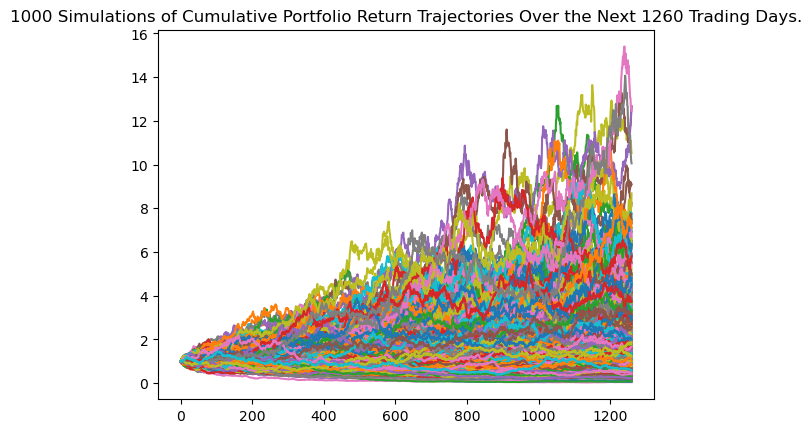

In [178]:
# Plot simulation outcomes for MV portfolio
MV_line_plot = MV_MC_even_dist.plot_simulation()


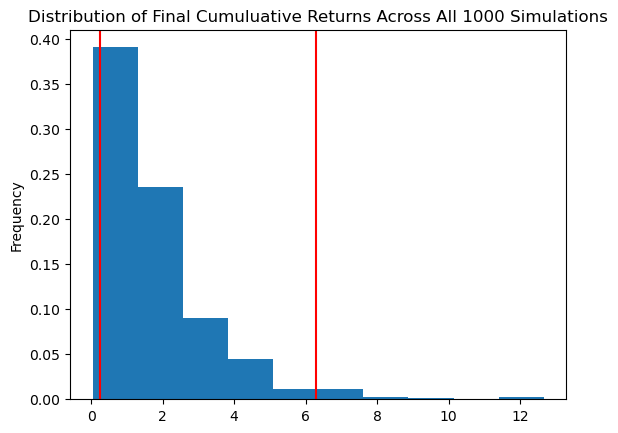

In [179]:
# Plot probability distribution and confidence intervals for MV portfolio
MV_dist_plot = MV_MC_even_dist.plot_distribution()

In [180]:
# Fetch summary statistics for MV portfolio from the Monte Carlo simulation results
mv_tbl = MV_MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(mv_tbl)

count           1000.000000
mean               1.811801
std                1.603645
min                0.047646
25%                0.779114
50%                1.322725
75%                2.314821
max               12.660116
95% CI Lower       0.248905
95% CI Upper       6.282912
Name: 1260, dtype: float64


In [181]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments MV in stocks
mv_ci_lower = round(mv_tbl[8]*10000,2)
mv_ci_upper = round(mv_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the MV portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${mv_ci_lower} and ${mv_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the MV portfolio over the next 5 years will end within in the range of $2489.05 and $62829.12.


## TSLA

In [29]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes for last year.
start = pd.Timestamp("2020-07-1", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-07-1", tz="America/New_York").isoformat()

# Set the ticker information=
tickers = "TSLA"

# Get 3 year's worth of historical price data
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
tsla_df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start,
    end=end
).df


# Display sample data
tsla_df_ticker.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-07-01 04:00:00+00:00,1083.00,1135.33,1080.500,1119.63,13326897,331230,1117.340944
2020-07-02 04:00:00+00:00,1221.48,1228.00,1185.600,1208.66,17250115,443895,1207.348675
2020-07-06 04:00:00+00:00,1276.69,1377.79,1266.044,1371.58,20569934,595340,1323.913026
2020-07-07 04:00:00+00:00,1405.01,1429.50,1336.710,1389.86,21490420,695480,1390.278353
2020-07-08 04:00:00+00:00,1405.00,1417.26,1311.340,1365.88,16316228,483788,1375.578410


In [30]:
# Reorganize the DataFrame
tsla_df_ticker = pd.concat([tsla_df_ticker], axis=1, keys=["TSLA"])

# Display sample data
tsla_df_ticker.head()

TSLA                                        \
                              open     high       low    close    volume   
timestamp                                                                  
2020-07-01 04:00:00+00:00  1083.00  1135.33  1080.500  1119.63  13326897   
2020-07-02 04:00:00+00:00  1221.48  1228.00  1185.600  1208.66  17250115   
2020-07-06 04:00:00+00:00  1276.69  1377.79  1266.044  1371.58  20569934   
2020-07-07 04:00:00+00:00  1405.01  1429.50  1336.710  1389.86  21490420   
2020-07-08 04:00:00+00:00  1405.00  1417.26  1311.340  1365.88  16316228   

                                                    
                          trade_count         vwap  
timestamp                                           
2020-07-01 04:00:00+00:00      331230  1117.340944  
2020-07-02 04:00:00+00:00      443895  1207.348675  
2020-07-06 04:00:00+00:00      595340  1323.913026  
2020-07-07 04:00:00+00:00      695480  1390.278353  
2020-07-08 04:00:00+00:00      483788  1375.578410

In [31]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
MC_TSLA = MCSimulation(
    portfolio_data = tsla_df_ticker,
    num_simulation = num_sims,
    num_trading_days = 252*5)

In [32]:
# Run Monte Carlo simulations to forecast five years daily returns
MC_TSLA.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.892881,1.018416,0.963792,1.052745,1.018674,0.924459,0.951681,0.988079,1.004048,0.979331,...,0.959386,0.930071,1.023444,0.977587,0.990386,1.003732,1.003240,0.959638,1.076616,0.951009
2,0.916781,1.024204,0.981818,1.098832,0.981775,0.931200,0.943310,0.954464,1.023372,0.975763,...,0.994167,0.893499,1.002430,0.985690,0.960192,0.905549,0.975050,0.880417,1.098725,0.952800
3,0.921611,1.087159,1.014438,1.135054,1.078819,1.040540,0.984691,0.847074,1.107468,0.967703,...,0.996294,0.819089,1.018358,1.005597,0.999771,0.905295,1.022387,1.009304,1.151256,0.982973
4,0.976042,1.061132,1.003863,1.130418,1.050095,1.135929,1.002307,0.863782,1.016465,0.872321,...,1.085763,0.893982,0.986558,1.014774,1.016019,0.920597,1.039719,1.009732,1.065216,0.917917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.910100,0.116535,0.020345,0.199391,0.642075,1.550447,1.104305,0.220658,4.088137,0.308047,...,0.145075,0.748972,0.401593,0.133329,0.092573,0.008296,0.065812,5.276427,0.037438,5.071296
1257,2.523377,0.122085,0.022327,0.198454,0.623983,1.489555,1.107817,0.221812,3.953432,0.301909,...,0.146279,0.730974,0.360723,0.138898,0.092673,0.008516,0.071281,5.306993,0.040123,4.599659
1258,2.375369,0.114216,0.023889,0.192796,0.622639,1.476836,1.054667,0.216286,4.009513,0.304186,...,0.140979,0.716475,0.375393,0.145514,0.088007,0.008243,0.075059,5.270408,0.039695,4.394893
1259,2.149289,0.107729,0.023979,0.191484,0.646046,1.458675,1.035073,0.213606,4.112699,0.294710,...,0.137434,0.718572,0.389241,0.142131,0.097953,0.007689,0.074359,5.749342,0.039619,4.450504


In [87]:
# Compute summary statistics from the simulated daily returns
tsla_simulated_returns_data = {
    "mean": list(MC_TSLA.simulated_return.mean(axis=1)),
    "median": list(MC_TSLA.simulated_return.median(axis=1)),
    "min": list(MC_TSLA.simulated_return.min(axis=1)),
    "max": list(MC_TSLA.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
tsla_df_simulated_returns = pd.DataFrame(tsla_simulated_returns_data)

# Display sample data
tsla_df_simulated_returns.tail()

,mean,median,min,max
1256,1.581016,0.244137,0.000334,68.484912
1257,1.577861,0.242332,0.000354,68.063994
1258,1.578938,0.246176,0.000353,65.757493
1259,1.583412,0.247391,0.000363,70.375457
1260,1.581628,0.240757,0.000361,75.332753


### Plot the Simulated Cumulative Return Trajectory for 'TSLA' over the Next Five Years 

#### Use just the `mean` and `median` forecasts.

<Axes: title={'center': 'Simulated Cumulative Return Behavior of TSLA Stock Over the Next Five Years'}>

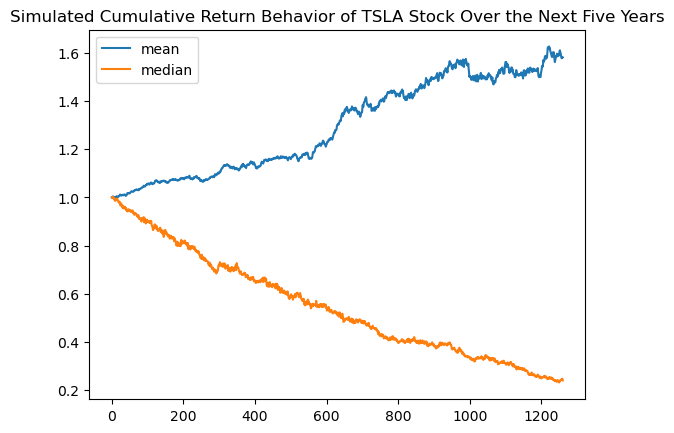

In [149]:
# Use the `plot` function to visually analyze TSLA cumulative returns over the next five years
# (Plot both mean and median forecasted cumulative return)
tsla_df_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of TSLA Stock Over the Next Five Years")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next Three Years

In [79]:
# Set initial investment
tsla_initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
tsla_cumulative_pnl = tsla_initial_investment * tsla_df_simulated_returns

# Display sample data
tsla_cumulative_pnl.tail()

,mean,median,min,max
1256,15810.158254,2441.370696,3.339046,684849.124650
1257,15778.609511,2423.319275,3.539664,680639.944662
1258,15789.381059,2461.755103,3.526196,657574.927499
1259,15834.117894,2473.906370,3.633930,703754.566027
1260,15816.281560,2407.574191,3.614478,753327.534312


### Plot the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next `1260` Trading Days

<Axes: title={'center': 'Simulated Outcomes Behavior of TSLA Stock Over the Next Five Years'}>

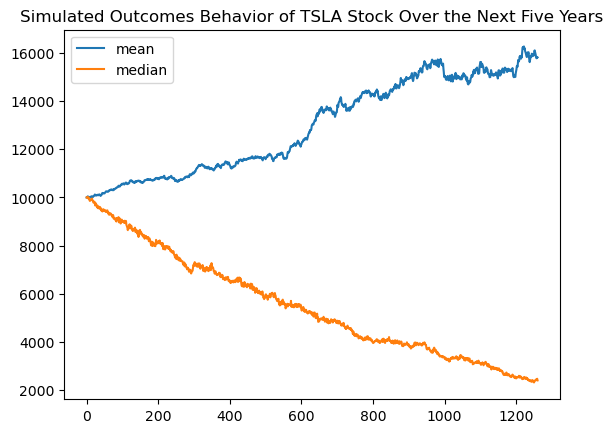

In [80]:
# Use the 'plot' function to create a chart of the simulated profits/losses
tsla_cumulative_pnl[['mean','median']].plot(title="Simulated Outcomes Behavior of TSLA Stock Over the Next Five Years")

### Calculate the range of the possible outcomes of our $10,000 investments in `TSLA` stocks

In [134]:
# Fetch summary statistics from the Monte Carlo simulation results
# Hint: Use the `summarize_cumulative_return` function
tsla_tbl = MC_TSLA.summarize_cumulative_return()

# Print summary statistics
print(tsla_tbl)

count           1000.000000
mean               1.581628
std                4.788353
min                0.000361
25%                0.066918
50%                0.240757
75%                1.009403
max               75.332753
95% CI Lower       0.005410
95% CI Upper      12.183643
Name: 1260, dtype: float64


In [83]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment in TSLA of $10,000 in the portfolio"
      f" over the next five years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment in TSLA of $10,000 in the portfolio over the next five years will end within in the range of $54.1 and $121836.43.


## LCID

In [128]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes for last year.
start = pd.Timestamp("2020-07-1", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-07-1", tz="America/New_York").isoformat()

# Set the ticker information=
tickers = "LCID"

# Get 3 year's worth of historical price data
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
lcid_df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start,
    end=end
).df


# Display sample data
lcid_df_ticker.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-09-18 04:00:00+00:00,10.25,10.250,9.8200,9.89,564328,463,9.905086
2020-09-21 04:00:00+00:00,9.90,9.960,9.8600,9.86,762763,3027,9.909600
2020-09-22 04:00:00+00:00,9.96,9.960,9.8500,9.88,1280789,1506,9.871129
2020-09-23 04:00:00+00:00,9.90,9.905,9.7901,9.85,192570,655,9.864035
2020-09-24 04:00:00+00:00,9.85,9.850,9.7500,9.77,605537,633,9.818596


In [129]:
# Reorganize the DataFrame
lcid_df_ticker = pd.concat([lcid_df_ticker], axis=1, keys=["LCID"])

# Display sample data
lcid_df_ticker.tail()

LCID                                           \
                            open  high   low close     volume trade_count   
timestamp                                                                   
2023-06-26 04:00:00+00:00  6.010  6.28  5.55  5.55  108897501      339219   
2023-06-27 04:00:00+00:00  5.790  6.15  5.56  6.10   74368400      198140   
2023-06-28 04:00:00+00:00  6.090  6.54  6.03  6.42   68847888      176055   
2023-06-29 04:00:00+00:00  6.475  6.94  6.41  6.88   72429777      190900   
2023-06-30 04:00:00+00:00  7.020  7.18  6.64  6.89   70596951      189788   

                                     
                               vwap  
timestamp                            
2023-06-26 04:00:00+00:00  5.930726  
2023-06-27 04:00:00+00:00  5.871815  
2023-06-28 04:00:00+00:00  6.367721  
2023-06-29 04:00:00+00:00  6.778238  
2023-06-30 04:00:00+00:00  6.974919

In [182]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
MC_LCID = MCSimulation(
    portfolio_data = lcid_df_ticker,
    num_simulation = num_sims,
    num_trading_days = 252*5)

In [183]:
# Run Monte Carlo simulations to forecast five years daily returns
MC_LCID.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992345,1.055521,1.032836,0.977166,0.939425,0.976010,1.033917,0.884952,0.961574,0.908412,...,0.990855,0.987428,0.961404,0.962648,0.971063,0.950732,1.025058,1.071100,1.009162,0.990596
2,0.990325,1.114490,0.945390,1.055564,0.875815,0.966387,1.063047,0.917527,1.001423,0.947995,...,1.025929,1.098672,0.847668,0.904050,1.067662,0.950079,0.977336,1.089829,1.062890,0.892409
3,1.055531,1.121550,0.922821,1.230771,0.866549,1.027488,0.979522,0.943836,1.034640,1.002496,...,1.012471,1.146240,0.906478,0.819471,1.122440,0.938006,1.138607,1.069987,1.035704,0.938831
4,1.089746,1.125769,0.829972,1.126843,0.842532,1.155358,1.074238,1.016201,1.039692,1.013410,...,1.093416,1.090357,0.854051,0.851658,1.117053,0.961758,1.097789,0.955371,1.076373,0.948971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.389960,0.017315,5.261578,0.992537,0.099134,0.042757,1.419580,0.089721,3.798372,0.920307,...,0.299512,6.937717,48.510217,0.048353,1.770579,1.534469,2.367671,0.748356,0.045731,1.584313
1257,0.377061,0.017066,4.709320,0.949389,0.099499,0.044046,1.484696,0.085033,3.872053,0.812077,...,0.294627,6.468224,46.356453,0.046764,1.671315,1.641016,2.398094,0.827065,0.046474,1.624311
1258,0.401491,0.014647,4.551424,1.023611,0.100349,0.043897,1.466559,0.095286,3.855371,0.836386,...,0.259068,6.616168,41.157790,0.044529,1.537409,1.477113,2.209027,0.808327,0.043910,1.630398
1259,0.410470,0.014483,4.881291,0.984268,0.100891,0.046666,1.509499,0.085084,4.036674,0.802565,...,0.253699,6.914518,41.254373,0.045206,1.521044,1.378153,2.246627,0.803057,0.043479,1.676272


In [184]:
# Compute summary statistics from the simulated daily returns
lcid_simulated_returns_data = {
    "mean": list(MC_LCID.simulated_return.mean(axis=1)),
    "median": list(MC_LCID.simulated_return.median(axis=1)),
    "min": list(MC_LCID.simulated_return.min(axis=1)),
    "max": list(MC_LCID.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
lcid_df_simulated_returns = pd.DataFrame(lcid_simulated_returns_data)

# Display sample data
lcid_df_simulated_returns.tail()

,mean,median,min,max
1256,3.589436,0.476732,0.000206,203.249075
1257,3.576795,0.482313,0.000191,186.111498
1258,3.631789,0.471122,0.000188,208.025779
1259,3.628759,0.472194,0.000184,193.712248
1260,3.646708,0.468017,0.000189,189.192673


### Plot the Simulated Cumulative Return Trajectory for 'LCID' over the Next Five Years 

#### Use just the `mean` and `median` forecasts.

<Axes: title={'center': 'Simulated Cumulative Return Behavior of LCID Stock Over the Next Five Years'}>

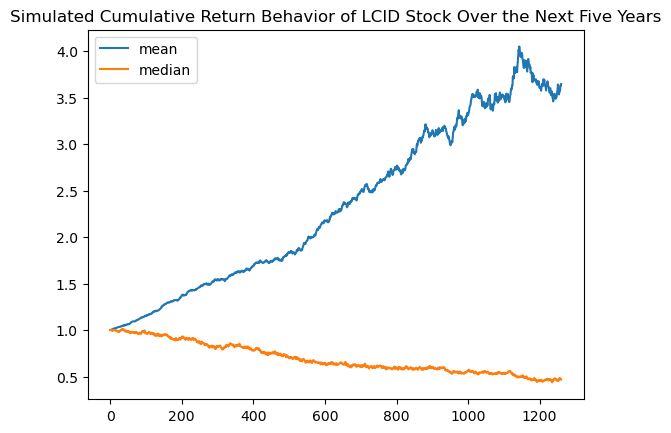

In [186]:
# Use the `plot` function to visually analyze TSLA cumulative returns over the next three hears
# (Plot both mean and median forecasted cumulative return)
lcid_df_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of LCID Stock Over the Next Five Years")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `LCID` Over the Next Five Years

In [187]:
# Set initial investment
lcid_initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
lcid_cumulative_pnl = lcid_initial_investment * lcid_df_simulated_returns

# Display sample data
lcid_cumulative_pnl.tail()

,mean,median,min,max
1256,35894.360466,4767.315666,2.063319,2.032491e+06
1257,35767.949949,4823.131619,1.914890,1.861115e+06
1258,36317.894317,4711.222425,1.876526,2.080258e+06
1259,36287.589935,4721.944719,1.838452,1.937122e+06
1260,36467.078086,4680.174336,1.890891,1.891927e+06


### Plot the Simulated Profits/Losses of $10,000 Investment in `LCID` Over the Next `1260` Trading Days

<Axes: title={'center': 'Simulated Outcomes Behavior of LCID Stock Over the Five Year'}>

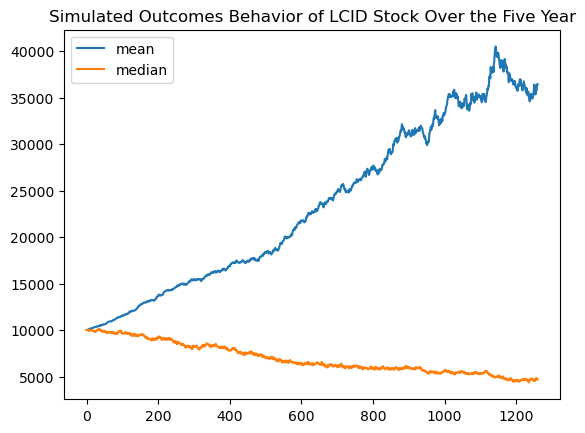

In [188]:
# Use the 'plot' function to create a chart of the simulated profits/losses
lcid_cumulative_pnl[['mean','median']].plot(title="Simulated Outcomes Behavior of LCID Stock Over the Five Year")

### Calculate the range of the possible outcomes of our $10,000 investments in `LCID` stocks

In [189]:
# Fetch summary statistics from the Monte Carlo simulation results
# Hint: Use the `summarize_cumulative_return` function
lcid_tbl = MC_LCID.summarize_cumulative_return()

# Print summary statistics
print(lcid_tbl)

count           1000.000000
mean               3.646708
std               13.351159
min                0.000189
25%                0.105576
50%                0.468017
75%                2.162111
max              189.192673
95% CI Lower       0.006416
95% CI Upper      26.474101
Name: 1260, dtype: float64


In [190]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in LCID stocks
lcid_ci_lower = round(lcid_tbl[8]*10000,2)
lcid_ci_upper = round(lcid_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment in LCID of $10,000 in the portfolio"
      f" over the next five years will end within in the range of"
      f" ${lcid_ci_lower} and ${lcid_ci_upper}.")

There is a 95% chance that an initial investment in LCID of $10,000 in the portfolio over the next five years will end within in the range of $64.16 and $264741.01.


## F

In [137]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes for last year.
start = pd.Timestamp("2020-07-1", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-07-1", tz="America/New_York").isoformat()

# Set the ticker information=
tickers = "F"

# Get 3 year's worth of historical price data
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
ford_df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start,
    end=end
).df


# Display sample data
ford_df_ticker.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-07-01 04:00:00+00:00,6.10,6.18,5.95,5.98,62454691,99176,6.020525
2020-07-02 04:00:00+00:00,6.10,6.17,6.00,6.05,67270506,104441,6.084685
2020-07-06 04:00:00+00:00,6.14,6.20,6.11,6.19,63921782,102258,6.160160
2020-07-07 04:00:00+00:00,6.14,6.20,6.09,6.12,56651981,87902,6.142349
2020-07-08 04:00:00+00:00,6.13,6.18,6.05,6.09,60928747,86125,6.093580


In [138]:
# Reorganize the DataFrame
ford_df_ticker = pd.concat([ford_df_ticker], axis=1, keys=["F"])

# Display sample data
ford_df_ticker.head()

F                                          \
                           open  high   low close    volume trade_count   
timestamp                                                                 
2020-07-01 04:00:00+00:00  6.10  6.18  5.95  5.98  62454691       99176   
2020-07-02 04:00:00+00:00  6.10  6.17  6.00  6.05  67270506      104441   
2020-07-06 04:00:00+00:00  6.14  6.20  6.11  6.19  63921782      102258   
2020-07-07 04:00:00+00:00  6.14  6.20  6.09  6.12  56651981       87902   
2020-07-08 04:00:00+00:00  6.13  6.18  6.05  6.09  60928747       86125   

                                     
                               vwap  
timestamp                            
2020-07-01 04:00:00+00:00  6.020525  
2020-07-02 04:00:00+00:00  6.084685  
2020-07-06 04:00:00+00:00  6.160160  
2020-07-07 04:00:00+00:00  6.142349  
2020-07-08 04:00:00+00:00  6.093580

In [140]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
MC_F = MCSimulation(
    portfolio_data = ford_df_ticker,
    num_simulation = num_sims,
    num_trading_days = 252*5)

In [141]:
# Run Monte Carlo simulations to forecast five years daily returns
MC_F.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002955,0.984384,1.012689,1.029555,0.966209,1.002939,1.003296,0.972385,1.052631,1.001517,...,0.982476,0.973703,1.008798,1.041622,0.986258,1.001938,0.998401,0.994842,0.973135,0.947279
2,1.015468,0.979993,1.072696,1.016115,0.993009,1.068944,1.028821,0.976641,1.010667,1.016423,...,1.007835,0.971768,1.023770,1.070375,0.958712,0.985980,0.972570,1.021527,0.960987,0.957212
3,1.029827,0.990814,1.102498,1.008681,1.028627,1.053509,1.028713,0.979418,0.963311,1.029450,...,1.052449,0.985071,1.029722,1.074132,0.967823,0.945027,0.959031,1.008226,0.962324,0.959652
4,1.029152,0.981182,1.134444,0.966321,1.006216,1.103015,0.996761,0.992901,0.969286,1.033552,...,1.053387,0.982733,1.051583,1.073107,0.976980,0.929810,1.001769,0.959084,0.998412,0.997491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,7.295203,1.856912,1.928000,2.329841,30.401871,11.868810,2.191287,8.350001,6.071671,10.654760,...,6.686415,3.888384,11.503433,1.988990,1.999548,4.720188,0.956540,0.573562,5.496092,12.420955
1257,7.580655,1.860115,1.964818,2.392867,31.393597,12.011516,2.233471,8.363687,6.080043,11.219024,...,6.654755,3.841388,11.712495,1.969669,2.083294,4.755069,0.942318,0.566677,5.672516,12.302507
1258,7.509033,1.820794,2.026424,2.389141,31.521008,11.617516,2.260997,8.269045,6.018263,11.219814,...,6.758689,3.636204,11.525216,1.915474,2.117807,4.519156,0.984410,0.572258,5.651747,12.064301
1259,7.871016,1.817418,2.038367,2.316979,31.504892,11.816305,2.236034,8.703877,6.015284,11.196073,...,7.201548,3.624494,11.208587,1.864026,2.064473,4.443521,1.019632,0.559314,5.721592,12.217522


### Plot the Simulated Cumulative Return Trajectory for Ford over the Next Five Years 

#### Use just the `mean` and `median` forecasts.

In [151]:
# Compute summary statistics from the simulated daily returns
ford_simulated_returns_data = {
    "mean": list(MC_F.simulated_return.mean(axis=1)),
    "median": list(MC_F.simulated_return.median(axis=1)),
    "min": list(MC_F.simulated_return.min(axis=1)),
    "max": list(MC_F.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
ford_df_simulated_returns = pd.DataFrame(ford_simulated_returns_data)

# Display sample data
ford_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.002945,1.002391,0.922392,1.089878
2,1.003958,1.002896,0.883115,1.121381
3,1.005047,1.003164,0.856549,1.151012
4,1.006571,1.004790,0.841766,1.177129


<Axes: title={'center': 'Simulated Cumulative Return Behavior of Ford Stock Over the Next Five Years'}>

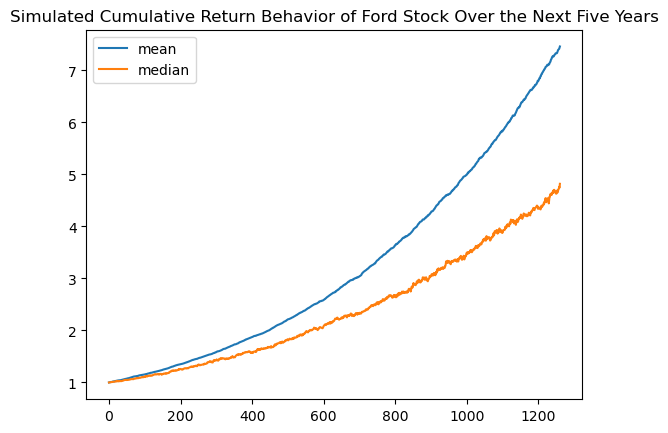

In [152]:
# Use the `plot` function to visually analyze Ford cumulative returns over the next five years
# (Plot both mean and median forecasted cumulative return)
ford_df_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of Ford Stock Over the Next Five Years")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `Ford` Over the Next Five Years

In [153]:
# Set initial investment
ford_initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
ford_cumulative_pnl = ford_initial_investment * ford_df_simulated_returns

# Display sample data
ford_cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10029.453163,10023.908718,9223.922469,10898.778080
2,10039.584505,10028.962272,8831.152649,11213.809778
3,10050.469374,10031.636886,8565.491124,11510.118132
4,10065.706113,10047.903531,8417.658969,11771.292512


### Plot the Simulated Profits/Losses of $10,000 Investment in `Ford` Over the Next Five Years 

<Axes: title={'center': 'Simulated Outcomes Behavior of Ford Stock Over the Five Years'}>

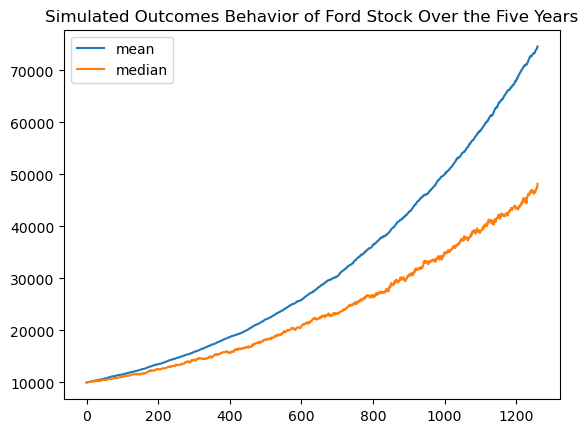

In [144]:
# Use the 'plot' function to create a chart of the simulated profits/losses
ford_cumulative_pnl[['mean','median']].plot(title="Simulated Outcomes Behavior of Ford Stock Over the Five Years")

In [154]:
# Fetch summary statistics from the Monte Carlo simulation results
# Hint: Use the `summarize_cumulative_return` function
ford_tbl = MC_F.summarize_cumulative_return()

# Print summary statistics
print(ford_tbl)

count           1000.000000
mean               7.460238
std                8.961849
min                0.174586
25%                2.473309
50%                4.819623
75%                8.956879
max               91.129091
95% CI Lower       0.713110
95% CI Upper      31.996727
Name: 1260, dtype: float64


In [158]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Ford stocks
ford_ci_lower = round(ford_tbl[8]*10000,2)
ford_ci_upper = round(ford_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next five years will end within in the range of"
      f" ${ford_ci_lower} and ${ford_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next five years will end within in the range of $7131.1 and $319967.27.


## MSFT

In [191]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes for last year.
start = pd.Timestamp("2020-07-1", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-07-1", tz="America/New_York").isoformat()

# Set the ticker information=
tickers = "MSFT"

# Get 3 year's worth of historical price data
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
msft_df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start,
    end=end
).df


# Display sample data
msft_df_ticker.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-07-01 04:00:00+00:00,203.1400,206.35,201.77,204.70,32061207,294021,204.576604
2020-07-02 04:00:00+00:00,205.6800,208.02,205.00,206.26,29315762,272179,206.951347
2020-07-06 04:00:00+00:00,208.8335,211.13,208.09,210.70,31899713,310510,210.136861
2020-07-07 04:00:00+00:00,210.4500,214.67,207.99,208.25,33601389,335835,211.293027
2020-07-08 04:00:00+00:00,210.0700,213.26,208.69,212.83,33601710,308117,211.519483


In [192]:
# Reorganize the DataFrame
msft_df_ticker = pd.concat([msft_df_ticker], axis=1, keys=["MSFT"])

# Display sample data
msft_df_ticker.head()

MSFT                                    \
                               open    high     low   close    volume   
timestamp                                                               
2020-07-01 04:00:00+00:00  203.1400  206.35  201.77  204.70  32061207   
2020-07-02 04:00:00+00:00  205.6800  208.02  205.00  206.26  29315762   
2020-07-06 04:00:00+00:00  208.8335  211.13  208.09  210.70  31899713   
2020-07-07 04:00:00+00:00  210.4500  214.67  207.99  208.25  33601389   
2020-07-08 04:00:00+00:00  210.0700  213.26  208.69  212.83  33601710   

                                                   
                          trade_count        vwap  
timestamp                                          
2020-07-01 04:00:00+00:00      294021  204.576604  
2020-07-02 04:00:00+00:00      272179  206.951347  
2020-07-06 04:00:00+00:00      310510  210.136861  
2020-07-07 04:00:00+00:00      335835  211.293027  
2020-07-08 04:00:00+00:00      308117  211.519483

In [194]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
MC_MSFT = MCSimulation(
    portfolio_data = msft_df_ticker,
    num_simulation = num_sims,
    num_trading_days = 252*5)

In [195]:
# Run Monte Carlo simulations to forecast five years daily returns
MC_MSFT.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989210,1.016627,0.993390,1.035667,1.013529,0.986696,0.987752,1.002645,1.022973,0.979798,...,0.988650,1.017119,1.001885,0.989047,1.008339,1.008123,1.021946,1.004836,1.021823,1.006360
2,0.961148,1.034995,0.959506,1.031313,0.994575,0.999788,0.982760,1.001445,1.017063,0.979698,...,0.956699,1.027575,0.993162,0.968333,0.998134,1.011062,1.018243,0.997725,1.008649,1.022519
3,0.991238,0.978364,0.950572,1.032939,0.966158,0.969478,0.977036,1.002495,0.993896,0.977730,...,0.946589,1.054082,0.992803,0.946869,0.987449,0.983208,1.006237,1.027930,1.011198,1.008113
4,0.991686,0.954249,0.950138,1.025482,0.995818,0.946261,0.971502,1.001318,1.000213,0.978746,...,0.991696,1.041388,0.958575,0.956127,0.993243,0.981646,0.985447,1.035540,1.020221,0.996078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.107999,1.049583,1.195031,1.889980,1.054815,1.747550,2.942973,1.531476,1.288179,7.104558,...,1.379296,2.899423,1.015196,0.649434,4.836715,1.471582,2.330873,13.156455,1.596751,2.837662
1257,1.104971,1.020659,1.239302,1.951884,1.065721,1.776415,2.988037,1.476856,1.276286,6.989838,...,1.361723,2.876932,0.980298,0.650597,4.785429,1.481410,2.389642,12.893520,1.617045,2.818009
1258,1.119931,1.009726,1.211104,1.996147,1.071937,1.777877,3.048618,1.475854,1.253074,7.154827,...,1.335497,2.912038,0.970670,0.660465,4.875995,1.508570,2.337746,12.727572,1.593562,2.780687
1259,1.098577,0.988958,1.240155,1.961142,1.102753,1.798459,3.006059,1.457596,1.264636,7.103054,...,1.330346,2.840269,0.927065,0.660918,4.702584,1.527426,2.289041,12.924263,1.587003,2.861130


In [199]:
# Compute summary statistics from the simulated daily returns
msft_simulated_returns_data = {
    "mean": list(MC_MSFT.simulated_return.mean(axis=1)),
    "median": list(MC_MSFT.simulated_return.median(axis=1)),
    "min": list(MC_MSFT.simulated_return.min(axis=1)),
    "max": list(MC_MSFT.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
msft_df_simulated_returns = pd.DataFrame(msft_simulated_returns_data)

# Display sample data
msft_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000848,1.001533,0.943755,1.064062
2,1.002223,1.003029,0.912142,1.088791
3,1.002859,1.000102,0.903357,1.101662
4,1.003843,1.002819,0.878904,1.123408


### Plot the Simulated Cumulative Return Trajectory for Ford over the Next Five Years 

#### Use just the `mean` and `median` forecasts.

<Axes: title={'center': 'Simulated Cumulative Return Behavior of MSFT Stock Over the Next Five Years'}>

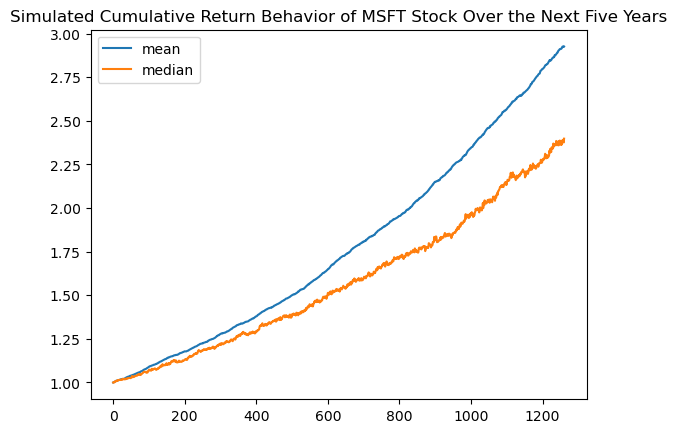

In [208]:
# Use the `plot` function to visually analyze Ford cumulative returns over the next five years
# (Plot both mean and median forecasted cumulative return)
msft_df_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of MSFT Stock Over the Next Five Years")

In [209]:
# Set initial investment
msft_initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
msft_cumulative_pnl = msft_initial_investment * msft_df_simulated_returns

# Display sample data
msft_cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10008.482031,10015.334941,9437.554547,10640.621130
2,10022.232854,10030.294755,9121.421440,10887.909960
3,10028.593299,10001.024542,9033.573288,11016.619785
4,10038.430319,10028.190396,8789.039900,11234.079844


<Axes: title={'center': 'Simulated Outcomes Behavior of MSFT Stock Over the Next Five Years'}>

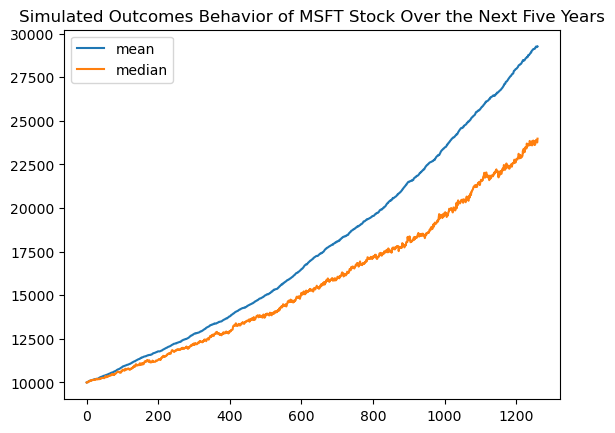

In [210]:
# Use the 'plot' function to create a chart of the simulated profits/losses
msft_cumulative_pnl[['mean','median']].plot(title="Simulated Outcomes Behavior of MSFT Stock Over the Next Five Years")

### Calculate the range of the possible outcomes of our $10,000 investments in `MSFT` stocks

In [211]:
# Fetch summary statistics from the Monte Carlo simulation results
# Hint: Use the `summarize_cumulative_return` function
msft_tbl = MC_MSFT.summarize_cumulative_return()

# Print summary statistics
print(msft_tbl)

count           1000.000000
mean               2.925725
std                2.041810
min                0.198419
25%                1.527771
50%                2.397386
75%                3.727244
max               15.450345
95% CI Lower       0.585506
95% CI Upper       8.291439
Name: 1260, dtype: float64


In [212]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
msft_ci_lower = round(msft_tbl[8]*10000,2)
msft_ci_upper = round(msft_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in MSFT"
      f" over the next five years will end within in the range of"
      f" ${msft_ci_lower} and ${msft_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in MSFT over the next five years will end within in the range of $5855.06 and $82914.39.


## GOOG

In [236]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes for last year.
start = pd.Timestamp("2020-07-1", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-07-1", tz="America/New_York").isoformat()

# Set the ticker information=
tickers = "GOOG"

# Get 3 year's worth of historical price data
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
goog_df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start,
    end=end
).df


# Display sample data
goog_df_ticker.tail()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2023-06-26 04:00:00+00:00,121.4656,122.720,118.99,119.09,23248901,237060,120.214274
2023-06-27 04:00:00+00:00,117.8400,119.895,116.91,119.01,27329293,271718,118.700725
2023-06-28 04:00:00+00:00,117.9600,121.270,117.60,121.08,19761320,217290,120.294881
2023-06-29 04:00:00+00:00,120.0900,120.910,119.21,120.01,18517458,190231,119.992739
2023-06-30 04:00:00+00:00,121.1000,122.030,120.90,120.92,18952180,216205,121.379810


In [237]:
# Reorganize the DataFrame
goog_df_ticker = pd.concat([goog_df_ticker], axis=1, keys=["GOOG"])

# Display sample data
goog_df_ticker.tail()

GOOG                                     \
                               open     high     low   close    volume   
timestamp                                                                
2023-06-26 04:00:00+00:00  121.4656  122.720  118.99  119.09  23248901   
2023-06-27 04:00:00+00:00  117.8400  119.895  116.91  119.01  27329293   
2023-06-28 04:00:00+00:00  117.9600  121.270  117.60  121.08  19761320   
2023-06-29 04:00:00+00:00  120.0900  120.910  119.21  120.01  18517458   
2023-06-30 04:00:00+00:00  121.1000  122.030  120.90  120.92  18952180   

                                                   
                          trade_count        vwap  
timestamp                                          
2023-06-26 04:00:00+00:00      237060  120.214274  
2023-06-27 04:00:00+00:00      271718  118.700725  
2023-06-28 04:00:00+00:00      217290  120.294881  
2023-06-29 04:00:00+00:00      190231  119.992739  
2023-06-30 04:00:00+00:00      216205  121.379810

In [218]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
MC_GOOG = MCSimulation(
    portfolio_data = goog_df_ticker,
    num_simulation = num_sims,
    num_trading_days = 252*5)

In [219]:
# Run Monte Carlo simulations to forecast five years daily returns
MC_GOOG.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.979772,1.019067,1.018716,1.010452,0.997850,0.991938,1.016116,0.980127,1.041620,1.034821,...,0.915168,1.031414,0.959201,1.060783,1.018438,1.014071,1.032524,1.029843,0.977593,1.045039
2,0.989089,1.074408,0.995104,0.986103,1.015417,0.970474,1.008932,0.970551,1.024968,1.037188,...,0.922234,1.024798,0.936250,1.074306,1.080955,0.964747,1.050965,1.084053,1.011314,1.094513
3,0.947799,1.058147,0.939246,0.936187,1.030273,0.967851,1.019682,0.908435,0.986944,1.060123,...,0.952816,0.968334,0.970154,1.051040,1.094894,0.922650,1.072612,1.126933,1.023785,1.165758
4,1.011498,0.998942,0.925131,0.969296,1.081577,0.986848,0.983302,0.953519,1.045387,1.004423,...,0.975988,1.007346,0.985567,1.021718,1.088138,0.959927,1.201254,1.111669,0.986462,1.092730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.653688,1.584661,0.072396,0.429312,0.751611,0.302503,1.422222,0.158676,0.086443,0.501327,...,0.026692,0.022976,0.194486,1.080354,0.402841,0.092578,0.362635,0.266195,0.014023,0.351779
1257,2.579569,1.509879,0.075043,0.452768,0.734060,0.287556,1.359047,0.160192,0.087561,0.525794,...,0.027392,0.022395,0.190806,1.159615,0.445206,0.090179,0.391212,0.255559,0.013550,0.363875
1258,2.545407,1.533551,0.073290,0.467764,0.730973,0.294224,1.355144,0.158562,0.090902,0.526705,...,0.027822,0.022529,0.207734,1.171462,0.426428,0.087723,0.440931,0.267593,0.013437,0.378662
1259,2.602892,1.613171,0.073274,0.465129,0.698468,0.291793,1.398708,0.167120,0.092555,0.509669,...,0.028398,0.023751,0.207303,1.133852,0.456151,0.086855,0.479264,0.264579,0.013941,0.359856


In [220]:
# Compute summary statistics from the simulated daily returns
goog_simulated_returns_data = {
    "mean": list(MC_GOOG.simulated_return.mean(axis=1)),
    "median": list(MC_GOOG.simulated_return.median(axis=1)),
    "min": list(MC_GOOG.simulated_return.min(axis=1)),
    "max": list(MC_GOOG.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
goog_df_simulated_returns = pd.DataFrame(goog_simulated_returns_data)

# Display sample data
goog_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.998002,0.999102,0.874334,1.126725
2,0.997368,0.996711,0.819376,1.229982
3,0.995453,0.996645,0.801174,1.280606
4,0.993624,0.994831,0.762111,1.290172


### Plot the Simulated Cumulative Return Trajectory for `GOOG` over the Next Five Years

#### Use just the `mean` and `median` forecasts.

<Axes: title={'center': 'Simulated Cumulative Return Behavior of GOOG Stock Over the Next Five Years'}>

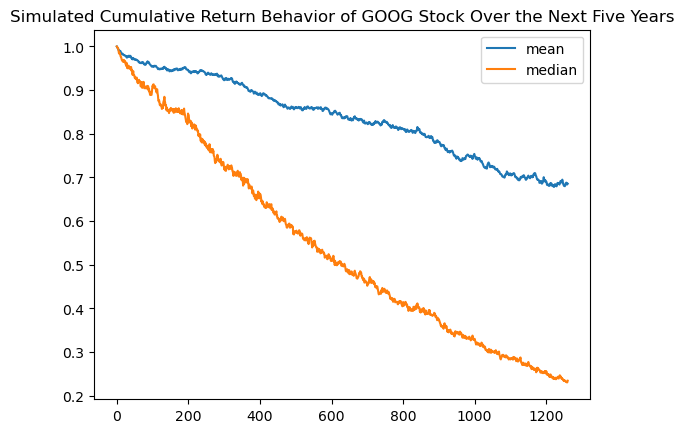

In [222]:
# Use the `plot` function to visually analyze TSLA cumulative returns over the next three hears
# (Plot both mean and median forecasted cumulative return)
goog_df_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of GOOG Stock Over the Next Five Years")

In [226]:
# Set initial investment
goog_initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
goog_cumulative_pnl = goog_initial_investment * goog_df_simulated_returns

# Display sample data
goog_cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,9980.021112,9991.018371,8743.335014,11267.252247
2,9973.680432,9967.107811,8193.756389,12299.822597
3,9954.527930,9966.448909,8011.735530,12806.060936
4,9936.242994,9948.308246,7621.111134,12901.718516


<Axes: title={'center': 'Simulated Outcomes Behavior of GOOG Stock Over the Next Five Years'}>

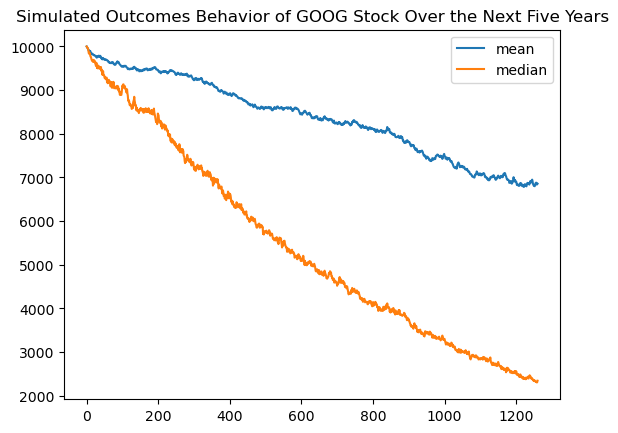

In [227]:
# Use the 'plot' function to create a chart of the simulated profits/losses
goog_cumulative_pnl[['mean','median']].plot(title="Simulated Outcomes Behavior of GOOG Stock Over the Next Five Years")

### Calculate the range of the possible outcomes of our $10,000 investments in `GOOG` stocks

In [231]:
# Fetch summary statistics from the Monte Carlo simulation results
# Hint: Use the `summarize_cumulative_return` function
goog_tbl = MC_GOOG.summarize_cumulative_return()

# Print summary statistics
print(goog_tbl)

count           1000.000000
mean               0.685782
std                1.815030
min                0.002067
25%                0.095762
50%                0.234572
75%                0.620444
max               40.499582
95% CI Lower       0.012950
95% CI Upper       4.561169
Name: 1260, dtype: float64


In [233]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
goog_ci_lower = round(goog_tbl[8]*10000,2)
goog_ci_upper = round(goog_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in GOOG"
      f" over the next year will end within in the range of"
      f" ${goog_ci_lower} and ${goog_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in GOOG over the next year will end within in the range of $129.5 and $45611.69.


## NVDA

In [238]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes for last year.
start = pd.Timestamp("2020-07-1", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-07-1", tz="America/New_York").isoformat()

# Set the ticker information=
tickers = "NVDA"

# Get 3 year's worth of historical price data
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
nvda_df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start,
    end=end
).df


# Display sample data
nvda_df_ticker.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-07-01 04:00:00+00:00,380.83,383.0269,376.52,381.20,8166170,110086,380.698367
2020-07-02 04:00:00+00:00,385.56,389.5000,383.13,384.49,9101352,109997,386.332902
2020-07-06 04:00:00+00:00,389.00,396.3500,388.50,393.57,7897343,113781,392.785480
2020-07-07 04:00:00+00:00,397.85,402.8000,394.03,394.87,8945030,133289,398.830634
2020-07-08 04:00:00+00:00,399.75,409.0000,398.62,408.64,9137055,132469,404.000408


In [239]:
# Reorganize the DataFrame
nvda_df_ticker = pd.concat([nvda_df_ticker], axis=1, keys=["NVDA"])

# Display sample data
nvda_df_ticker.head()

NVDA                                     \
                             open      high     low   close   volume   
timestamp                                                              
2020-07-01 04:00:00+00:00  380.83  383.0269  376.52  381.20  8166170   
2020-07-02 04:00:00+00:00  385.56  389.5000  383.13  384.49  9101352   
2020-07-06 04:00:00+00:00  389.00  396.3500  388.50  393.57  7897343   
2020-07-07 04:00:00+00:00  397.85  402.8000  394.03  394.87  8945030   
2020-07-08 04:00:00+00:00  399.75  409.0000  398.62  408.64  9137055   

                                                   
                          trade_count        vwap  
timestamp                                          
2020-07-01 04:00:00+00:00      110086  380.698367  
2020-07-02 04:00:00+00:00      109997  386.332902  
2020-07-06 04:00:00+00:00      113781  392.785480  
2020-07-07 04:00:00+00:00      133289  398.830634  
2020-07-08 04:00:00+00:00      132469  404.000408

In [240]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
MC_NVDA = MCSimulation(
    portfolio_data = nvda_df_ticker,
    num_simulation = num_sims,
    num_trading_days = 252*5)

In [241]:
# Run Monte Carlo simulations to forecast five years daily returns
MC_NVDA.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990746,0.994191,0.989563,0.970206,0.919208,1.036100,1.021455,1.047978,1.037330,1.057234,...,1.100348,1.042609,0.885401,0.999327,1.029922,0.962074,1.011679,1.003678,0.964264,0.980974
2,0.992845,1.024765,1.018385,0.937059,0.899647,1.011728,1.024463,1.061414,1.025623,1.134619,...,1.163034,1.061966,0.869040,1.025663,1.040626,0.935360,0.931538,0.967321,0.942052,0.987900
3,1.003235,0.970997,1.090165,0.949149,0.930318,1.007744,1.069384,1.121181,1.013375,1.096620,...,1.244914,1.022670,0.923196,1.032429,1.001788,0.944674,0.931363,1.002421,0.950383,0.912372
4,1.007462,0.952864,1.120554,0.902026,0.925802,0.955716,1.045734,1.061457,1.076226,1.190756,...,1.198723,1.082492,0.978558,0.972380,1.009436,0.859903,0.923167,1.113245,0.941600,0.864164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,19.231758,3.323565,0.930244,0.266570,1.045979,1.054730,0.146979,13.481311,0.618032,14.205679,...,2.336565,0.585085,0.971929,0.620902,2.051998,2.380270,0.589047,27.705198,2.982386,21.341544
1257,19.383558,3.350508,0.950303,0.246598,1.031575,1.071874,0.153803,12.878189,0.632028,14.190882,...,2.370782,0.567159,0.967400,0.621963,2.105317,2.462332,0.554122,26.498695,3.092955,21.256547
1258,20.966288,3.339801,0.889372,0.233325,1.039748,1.044690,0.159937,12.103604,0.679584,14.671643,...,2.396181,0.576763,0.996253,0.655799,2.066655,2.410987,0.551077,27.191895,2.983907,20.122246
1259,19.767736,3.455553,0.968823,0.217098,1.065252,1.075117,0.162810,12.548464,0.704977,15.292057,...,2.296232,0.582810,1.022659,0.633202,1.992859,2.601853,0.545806,28.153573,2.859649,19.527152


In [242]:
# Compute summary statistics from the simulated daily returns
nvda_simulated_returns_data = {
    "mean": list(MC_NVDA.simulated_return.mean(axis=1)),
    "median": list(MC_NVDA.simulated_return.median(axis=1)),
    "min": list(MC_NVDA.simulated_return.min(axis=1)),
    "max": list(MC_NVDA.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
nvda_df_simulated_returns = pd.DataFrame(nvda_simulated_returns_data)

# Display sample data
nvda_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.002971,1.003205,0.872015,1.137944
2,1.004565,1.003672,0.802917,1.196498
3,1.008021,1.005320,0.767099,1.244914
4,1.010829,1.008367,0.725777,1.322805


### Plot the Simulated Cumulative Return Trajectory for `NVDA` over the Next Five Years 

#### Use just the `mean` and `median` forecasts.

<Axes: title={'center': 'Simulated Cumulative Return Behavior of NVDA Stock Over the Next Five Years'}>

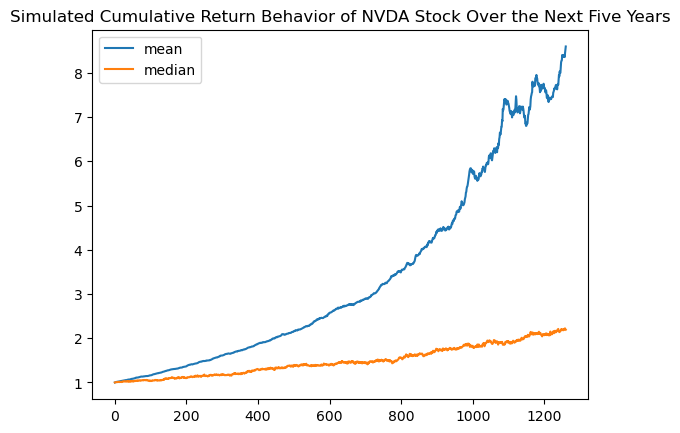

In [249]:
# Use the `plot` function to visually analyze NVDA cumulative returns over the next three hears
# (Plot both mean and median forecasted cumulative return)
nvda_df_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of NVDA Stock Over the Next Five Years")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `NVDA` Over the Next Three Years

In [250]:
# Set initial investment
nvda_initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
nvda_cumulative_pnl = nvda_initial_investment * nvda_df_simulated_returns

# Display sample data
nvda_cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10029.705641,10032.047445,8720.146693,11379.444707
2,10045.649875,10036.723713,8029.166772,11964.982383
3,10080.214355,10053.200095,7670.994920,12449.135018
4,10108.292962,10083.665390,7257.773245,13228.045103


<Axes: title={'center': 'Simulated Outcomes Behavior of NVDA Stock Over the Next Five Years'}>

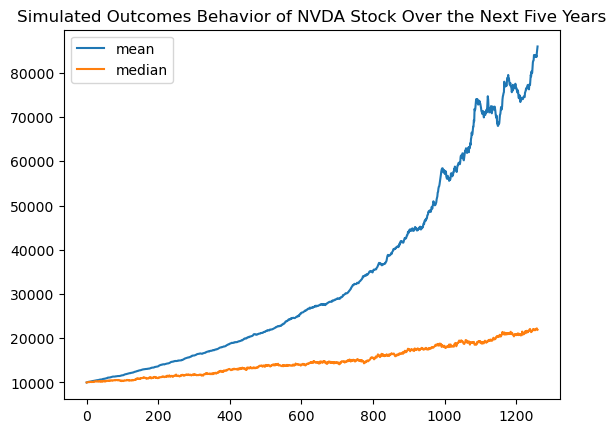

In [251]:
# Use the 'plot' function to create a chart of the simulated profits/losses
nvda_cumulative_pnl[['mean','median']].plot(title="Simulated Outcomes Behavior of NVDA Stock Over the Next Five Years")

### Calculate the range of the possible outcomes of our $10,000 investments in `NVDA` stocks

In [252]:
# Fetch summary statistics from the Monte Carlo simulation results
# Hint: Use the `summarize_cumulative_return` function
nvda_tbl = MC_NVDA.summarize_cumulative_return()

# Print summary statistics
print(nvda_tbl)

count           1000.000000
mean               8.595391
std               52.997541
min                0.016088
25%                0.684201
50%                2.192644
75%                5.841736
max             1564.355663
95% CI Lower       0.102641
95% CI Upper      41.100435
Name: 1260, dtype: float64


In [253]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
nvda_ci_lower = round(nvda_tbl[8]*10000,2)
nvda_ci_upper = round(nvda_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in NVDA"
      f" over the next five years will end within in the range of"
      f" ${nvda_ci_lower} and ${nvda_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in NVDA over the next five years will end within in the range of $1026.41 and $411004.35.


## META

In [255]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes for last year.
start = pd.Timestamp("2020-07-1", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-07-1", tz="America/New_York").isoformat()

# Set the ticker information=
tickers = "META"

# Get 3 year's worth of historical price data
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
meta_df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start,
    end=end
).df


# Display sample data
meta_df_ticker.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-07-01 04:00:00+00:00,228.50,239.00,227.56,237.55,43400289,400706,234.434059
2020-07-02 04:00:00+00:00,239.00,240.00,232.61,233.42,30633620,298883,235.449576
2020-07-06 04:00:00+00:00,233.76,240.40,232.27,240.28,26208458,256191,237.814047
2020-07-07 04:00:00+00:00,239.41,247.65,238.82,240.86,27887936,279309,243.701442
2020-07-08 04:00:00+00:00,238.11,246.99,236.59,243.58,29792601,290455,241.524051


In [256]:
# Reorganize the DataFrame
meta_df_ticker = pd.concat([meta_df_ticker], axis=1, keys=["META"])

# Display sample data
meta_df_ticker.head()

META                                    \
                             open    high     low   close    volume   
timestamp                                                             
2020-07-01 04:00:00+00:00  228.50  239.00  227.56  237.55  43400289   
2020-07-02 04:00:00+00:00  239.00  240.00  232.61  233.42  30633620   
2020-07-06 04:00:00+00:00  233.76  240.40  232.27  240.28  26208458   
2020-07-07 04:00:00+00:00  239.41  247.65  238.82  240.86  27887936   
2020-07-08 04:00:00+00:00  238.11  246.99  236.59  243.58  29792601   

                                                   
                          trade_count        vwap  
timestamp                                          
2020-07-01 04:00:00+00:00      400706  234.434059  
2020-07-02 04:00:00+00:00      298883  235.449576  
2020-07-06 04:00:00+00:00      256191  237.814047  
2020-07-07 04:00:00+00:00      279309  243.701442  
2020-07-08 04:00:00+00:00      290455  241.524051

In [259]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
MC_META = MCSimulation(
    portfolio_data = meta_df_ticker,
    num_simulation = num_sims,
    num_trading_days = 252*5)

In [260]:
# Run Monte Carlo simulations to forecast five years daily returns
MC_META.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993788,0.972497,1.022294,0.947624,1.081931,0.964995,1.020575,1.023318,0.980123,0.992828,...,0.973853,1.006479,0.942590,1.039274,0.991465,0.968757,0.999812,0.960024,0.991805,0.997521
2,0.947645,0.930016,0.994221,0.909566,1.024967,0.990260,1.056022,1.095632,1.005739,1.023699,...,0.964141,1.036747,0.958102,1.030242,0.996149,0.952644,0.983638,0.965507,1.031161,1.006564
3,0.957164,0.931098,0.961171,0.902975,0.960335,1.000479,1.073768,1.052765,1.010511,0.995176,...,0.944323,1.027460,0.975665,1.028268,0.981965,0.946713,1.003682,0.952975,1.061360,1.026552
4,0.988922,0.931917,0.991599,0.893357,0.941714,1.014595,0.996074,1.039315,0.994246,0.989023,...,0.909285,1.056127,0.937714,0.994658,1.020205,0.959134,0.974022,0.905544,1.154319,0.985055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.187873,1.743954,0.313206,1.658276,0.665603,0.242018,0.043813,1.631118,0.706081,15.340242,...,0.427337,1.746987,1.310231,4.708482,1.422819,0.248104,0.598903,6.490261,0.955134,0.545653
1257,2.201408,1.783176,0.313982,1.675157,0.642779,0.244456,0.043769,1.600804,0.706923,15.136990,...,0.421984,1.723643,1.271376,5.023284,1.523696,0.253048,0.554885,6.564097,0.993086,0.525502
1258,2.174480,1.839661,0.299745,1.599864,0.630839,0.241369,0.043353,1.611882,0.729675,15.081467,...,0.443189,1.820166,1.307365,4.730812,1.478616,0.251950,0.589881,6.681302,0.976762,0.533044
1259,2.189959,1.967737,0.297395,1.567600,0.647580,0.250968,0.041844,1.665280,0.776125,15.513870,...,0.440943,1.814355,1.288762,4.836548,1.472493,0.252174,0.592670,6.893877,0.997033,0.522352


In [261]:
# Compute summary statistics from the simulated daily returns
meta_simulated_returns_data = {
    "mean": list(MC_META.simulated_return.mean(axis=1)),
    "median": list(MC_META.simulated_return.median(axis=1)),
    "min": list(MC_META.simulated_return.min(axis=1)),
    "max": list(MC_META.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
meta_df_simulated_returns = pd.DataFrame(meta_simulated_returns_data)

# Display sample data
meta_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.003020,1.004615,0.904269,1.097779
2,1.003668,1.002824,0.880583,1.146779
3,1.004371,1.001759,0.839947,1.216167
4,1.005108,1.002922,0.816274,1.210280


### Plot the Simulated Cumulative Return Trajectory for `META` over the Next Five Years 

#### Use just the `mean` and `median` forecasts.

<Axes: title={'center': 'Simulated Cumulative Return Behavior of META Stock Over the Next Five Years'}>

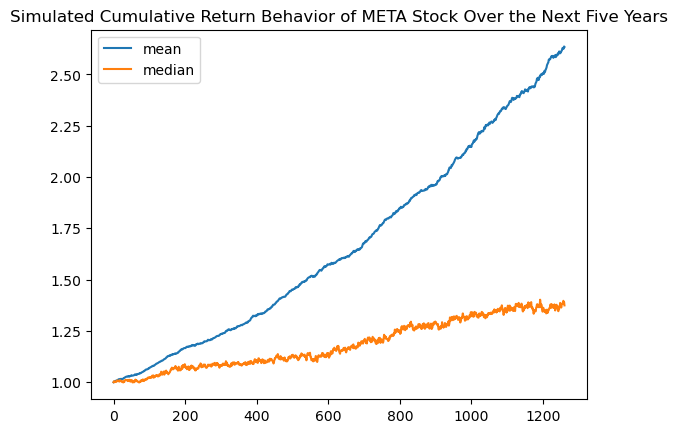

In [263]:
# Use the `plot` function to visually analyze NVDA cumulative returns over the next three hears
# (Plot both mean and median forecasted cumulative return)
meta_df_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of META Stock Over the Next Five Years")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `META` Over the Next Five Years

In [282]:
# Set initial investment
meta_initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
meta_cumulative_pnl = meta_initial_investment * meta_df_simulated_returns

# Display sample data
meta_cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10030.195647,10046.147909,9042.685887,10977.791221
2,10036.679667,10028.237349,8805.826681,11467.788319
3,10043.712617,10017.589967,8399.468289,12161.667811
4,10051.077400,10029.217436,8162.738262,12102.796856


<Axes: title={'center': 'Simulated Outcomes Behavior of META Stock Over the Next Five Years'}>

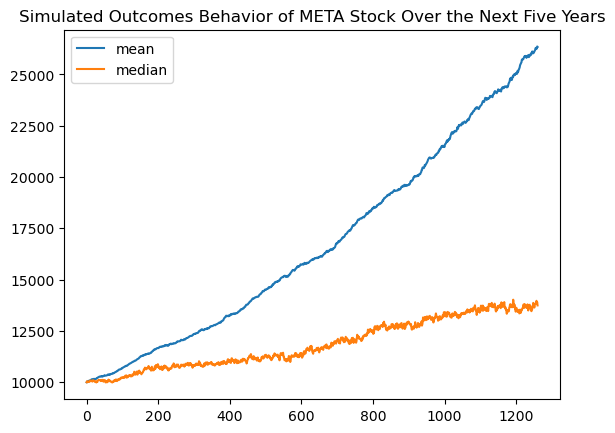

In [283]:
# Use the 'plot' function to create a chart of the simulated profits/losses
meta_cumulative_pnl[['mean','median']].plot(title="Simulated Outcomes Behavior of META Stock Over the Next Five Years")

In [284]:
# Fetch summary statistics from the Monte Carlo simulation results
# Hint: Use the `summarize_cumulative_return` function
meta_tbl = MC_META.summarize_cumulative_return()

# Print summary statistics
print(meta_tbl)

count           1000.000000
mean               2.633804
std                4.058105
min                0.042607
25%                0.694482
50%                1.374558
75%                2.821539
max               45.938560
95% CI Lower       0.192568
95% CI Upper      14.016140
Name: 1260, dtype: float64


In [274]:
#Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in META stocks
meta_ci_lower = round(meta_tbl[8]*10000,2)
meta_ci_upper = round(meta_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in META"
      f" over the next five years will end within in the range of"
      f" ${meta_ci_lower} and ${meta_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in META over the next five years will end within in the range of $1925.68 and $140161.4.


## RBLX

In [275]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes for last year.
start = pd.Timestamp("2020-07-1", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-07-1", tz="America/New_York").isoformat()

# Set the ticker information=
tickers = "RBLX"

# Get 3 year's worth of historical price data
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
rblx_df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start,
    end=end
).df


# Display sample data
rblx_df_ticker.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2021-03-10 05:00:00+00:00,64.50,74.83,60.50,69.50,97071774,1070040,68.637342
2021-03-11 05:00:00+00:00,74.93,77.78,70.13,73.90,59629264,723067,73.698158
2021-03-12 05:00:00+00:00,72.47,72.96,69.11,69.70,19714717,275827,70.423308
2021-03-15 04:00:00+00:00,70.02,74.06,66.25,72.15,19607068,231499,70.574271
2021-03-16 04:00:00+00:00,73.73,78.00,73.18,77.00,30274438,242550,76.188443


In [276]:
# Reorganize the DataFrame
rblx_df_ticker = pd.concat([rblx_df_ticker], axis=1, keys=["RBLX"])

# Display sample data
rblx_df_ticker.head()

RBLX                                             \
                            open   high    low  close    volume trade_count   
timestamp                                                                     
2021-03-10 05:00:00+00:00  64.50  74.83  60.50  69.50  97071774     1070040   
2021-03-11 05:00:00+00:00  74.93  77.78  70.13  73.90  59629264      723067   
2021-03-12 05:00:00+00:00  72.47  72.96  69.11  69.70  19714717      275827   
2021-03-15 04:00:00+00:00  70.02  74.06  66.25  72.15  19607068      231499   
2021-03-16 04:00:00+00:00  73.73  78.00  73.18  77.00  30274438      242550   

                                      
                                vwap  
timestamp                             
2021-03-10 05:00:00+00:00  68.637342  
2021-03-11 05:00:00+00:00  73.698158  
2021-03-12 05:00:00+00:00  70.423308  
2021-03-15 04:00:00+00:00  70.574271  
2021-03-16 04:00:00+00:00  76.188443

In [278]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
MC_RBLX = MCSimulation(
    portfolio_data = rblx_df_ticker,
    num_simulation = num_sims,
    num_trading_days = 252*5)

In [279]:
# Run Monte Carlo simulations to forecast five years daily returns
MC_RBLX.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.952279,0.991118,0.958042,0.872377,0.986945,0.972054,0.840949,0.980871,0.882378,0.975976,...,1.053960,1.061428,1.004144,1.060814,1.044535,1.011817,1.070091,0.984625,1.059861,0.969256
2,0.876247,0.948654,1.022820,0.949445,1.023687,1.043546,0.873663,1.042797,0.877830,1.054706,...,1.088235,1.110382,1.044284,1.000222,0.993837,0.907756,0.979676,1.042381,1.061968,0.901591
3,0.895292,0.868760,1.064141,0.967159,0.980187,1.034965,0.981800,0.998589,0.870153,0.995849,...,1.071664,0.984714,1.015634,1.005662,0.941995,0.903734,0.908632,0.959459,1.070849,1.000889
4,0.862010,0.877492,1.022336,0.931933,0.917337,1.022403,0.891404,0.978722,0.821951,1.066325,...,1.074797,1.015577,1.005278,1.061860,0.916296,0.893653,0.875062,0.929354,1.175060,0.933904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.124155,0.076452,2.828821,0.276067,0.507821,0.301525,1.393980,0.024545,1.143552,0.567025,...,4.761073,1.122130,0.117160,0.262813,0.567783,0.516246,0.034282,0.004724,0.143133,0.219748
1257,0.109464,0.072059,2.907479,0.251851,0.485151,0.280924,1.323510,0.022082,1.029222,0.564027,...,4.835966,1.140205,0.133853,0.272190,0.594553,0.521196,0.028127,0.004747,0.153468,0.217716
1258,0.115411,0.074428,2.946878,0.244271,0.458435,0.291241,1.372725,0.022654,1.160608,0.609562,...,4.657778,1.184253,0.129857,0.240442,0.579074,0.572951,0.029303,0.004339,0.146519,0.232430
1259,0.125755,0.070742,2.934523,0.280379,0.431373,0.320014,1.413009,0.022927,1.102394,0.685928,...,5.077856,1.267805,0.124879,0.248773,0.557917,0.557298,0.028861,0.004135,0.161693,0.216416


In [280]:
# Compute summary statistics from the simulated daily returns
rblx_simulated_returns_data = {
    "mean": list(MC_RBLX.simulated_return.mean(axis=1)),
    "median": list(MC_RBLX.simulated_return.median(axis=1)),
    "min": list(MC_RBLX.simulated_return.min(axis=1)),
    "max": list(MC_RBLX.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
rblx_df_simulated_returns = pd.DataFrame(rblx_simulated_returns_data)

# Display sample data
rblx_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001755,1.002001,0.828954,1.149569
2,1.002070,0.998830,0.781951,1.246687
3,1.004993,1.003866,0.702878,1.279853
4,1.005651,1.000032,0.701511,1.413919


### Plot the Simulated Cumulative Return Trajectory for `RBLX` over the Next Five Years 

#### Use just the `mean` and `median` forecasts.

<Axes: title={'center': 'Simulated Cumulative Return Behavior of RBLX Stock Over the Next Five Years'}>

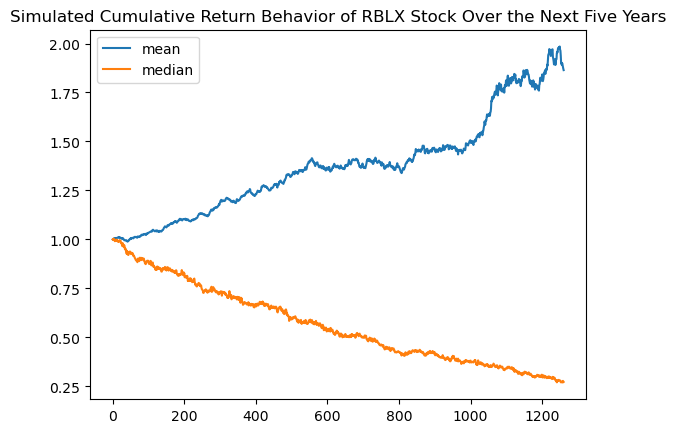

In [281]:
# Use the `plot` function to visually analyze RBLX cumulative returns over the next three hears
# (Plot both mean and median forecasted cumulative return)
rblx_df_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of RBLX Stock Over the Next Five Years")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `RBLX` Over the Next Five Years

In [285]:
# Set initial investment
rblx_initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
rblx_cumulative_pnl = rblx_initial_investment * rblx_df_simulated_returns

# Display sample data
rblx_cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10017.552837,10020.014399,8289.543985,11495.686622
2,10020.699750,9988.303561,7819.507348,12466.869892
3,10049.932836,10038.658255,7028.775874,12798.525223
4,10056.510831,10000.323171,7015.107638,14139.188093


### Plot the Simulated Profits/Losses of $10,000 Investment in `RBLX` Over the Next Five Years 

<Axes: title={'center': 'Simulated Outcomes Behavior of RBLX Stock Over the Next Five Year'}>

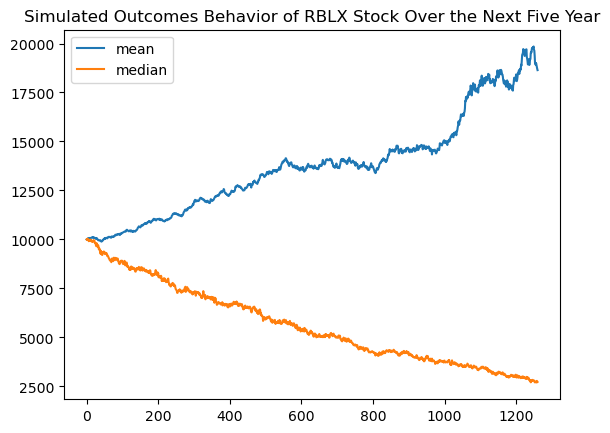

In [287]:
# Use the 'plot' function to create a chart of the simulated profits/losses
rblx_cumulative_pnl[['mean','median']].plot(title="Simulated Outcomes Behavior of RBLX Stock Over the Next Five Year")

### Calculate the range of the possible outcomes of our $10,000 investments in `RBLX` stocks

In [288]:
# Fetch summary statistics from the Monte Carlo simulation results
# Hint: Use the `summarize_cumulative_return` function
rblx_tbl = MC_RBLX.summarize_cumulative_return()

# Print summary statistics
print(rblx_tbl)

count           1000.000000
mean               1.864233
std                8.860902
min                0.000544
25%                0.068786
50%                0.272772
75%                0.932089
max              192.296751
95% CI Lower       0.005439
95% CI Upper      13.339893
Name: 1260, dtype: float64


In [289]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
rblx_ci_lower = round(rblx_tbl[8]*10000,2)
rblx_ci_upper = round(rblx_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in RBLX"
      f" over the five next years will end within in the range of"
      f" ${rblx_ci_lower} and ${rblx_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in RBLX over the five next years will end within in the range of $54.39 and $133398.93.


## AAPL

In [290]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes for last year.
start = pd.Timestamp("2020-07-1", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-07-1", tz="America/New_York").isoformat()

# Set the ticker information=
tickers = "AAPL"

# Get 3 year's worth of historical price data
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
aapl_df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start,
    end=end
).df


# Display sample data
aapl_df_ticker.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-07-01 04:00:00+00:00,365.12,367.36,363.91,364.11,27684309,317158,365.704401
2020-07-02 04:00:00+00:00,367.85,370.47,363.64,364.11,28510542,304462,367.043939
2020-07-06 04:00:00+00:00,370.00,375.78,369.87,373.85,29663966,335178,373.406953
2020-07-07 04:00:00+00:00,375.41,378.62,372.23,372.69,28106823,312187,375.707017
2020-07-08 04:00:00+00:00,376.72,381.50,376.36,381.37,29274427,328596,379.539909


In [291]:
# Reorganize the DataFrame
aapl_df_ticker = pd.concat([aapl_df_ticker], axis=1, keys=["AAPL"])

# Display sample data
aapl_df_ticker.head()

AAPL                                    \
                             open    high     low   close    volume   
timestamp                                                             
2020-07-01 04:00:00+00:00  365.12  367.36  363.91  364.11  27684309   
2020-07-02 04:00:00+00:00  367.85  370.47  363.64  364.11  28510542   
2020-07-06 04:00:00+00:00  370.00  375.78  369.87  373.85  29663966   
2020-07-07 04:00:00+00:00  375.41  378.62  372.23  372.69  28106823   
2020-07-08 04:00:00+00:00  376.72  381.50  376.36  381.37  29274427   

                                                   
                          trade_count        vwap  
timestamp                                          
2020-07-01 04:00:00+00:00      317158  365.704401  
2020-07-02 04:00:00+00:00      304462  367.043939  
2020-07-06 04:00:00+00:00      335178  373.406953  
2020-07-07 04:00:00+00:00      312187  375.707017  
2020-07-08 04:00:00+00:00      328596  379.539909

In [293]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
MC_AAPL= MCSimulation(
    portfolio_data = aapl_df_ticker,
    num_simulation = num_sims,
    num_trading_days = 252*5)

In [294]:
# Run Monte Carlo simulations to forecast five years daily returns
MC_AAPL.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999498,1.049141,1.053964,1.023863,1.012514,0.947703,1.031760,0.966844,1.013305,1.004951,...,1.023335,0.980449,1.054389,1.043212,0.989936,0.989656,1.025012,1.043784,1.023925,1.005933
2,0.984950,1.108144,1.065683,1.026433,1.019709,0.973163,1.069576,0.999676,1.026958,1.013701,...,1.018796,0.969364,1.034610,1.027003,1.016235,0.971261,0.972095,1.088392,0.999108,1.015614
3,0.948196,1.090084,1.119434,1.045006,1.066273,0.983257,1.076238,0.984103,1.007119,0.973599,...,1.019797,0.966979,0.961901,0.991527,1.005494,1.012165,0.972220,1.065935,1.037707,1.035099
4,0.958938,1.104498,1.080698,1.006989,1.065693,0.997663,1.113046,1.033178,0.984762,0.999178,...,1.038503,1.013154,0.909389,1.014520,1.015443,1.014381,0.941831,1.043634,1.021726,1.071307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.186452,0.155777,1.628006,0.165233,0.333379,5.865421,0.212588,1.088983,0.308481,1.272081,...,0.198848,1.124219,0.235871,0.047706,0.340885,4.097777,0.237270,3.866265,2.773324,0.386716
1257,4.131352,0.151885,1.661775,0.156099,0.329629,5.563971,0.221517,1.112355,0.285327,1.233470,...,0.190679,1.128797,0.245844,0.047901,0.324879,4.171267,0.241949,3.800244,2.802758,0.401018
1258,4.193120,0.157859,1.731646,0.159898,0.325752,5.445830,0.222777,1.066531,0.289643,1.217066,...,0.185400,1.090605,0.244830,0.048574,0.317886,4.147405,0.228480,3.710196,2.846309,0.401546
1259,3.972992,0.163074,1.761278,0.153681,0.326328,5.288091,0.213917,1.098151,0.307462,1.235104,...,0.179895,1.111399,0.247185,0.049450,0.315098,4.117248,0.215460,3.726702,2.782481,0.381310


In [296]:
# Compute summary statistics from the simulated daily returns
aapl_simulated_returns_data = {
    "mean": list(MC_AAPL.simulated_return.mean(axis=1)),
    "median": list(MC_AAPL.simulated_return.median(axis=1)),
    "min": list(MC_AAPL.simulated_return.min(axis=1)),
    "max": list(MC_AAPL.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
aapl_df_simulated_returns = pd.DataFrame(aapl_simulated_returns_data)

# Display sample data
aapl_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000505,1.001451,0.888432,1.100560
2,1.001110,1.002084,0.866741,1.150732
3,1.003083,1.001786,0.825689,1.218519
4,1.003338,1.003898,0.799283,1.254617


### Plot the Simulated Cumulative Return Trajectory for `AAPL` over the Next Five Years

#### Use just the `mean` and `median` forecasts.

<Axes: title={'center': 'Simulated Cumulative Return Behavior of AAPL Stock Over the Next Five Years'}>

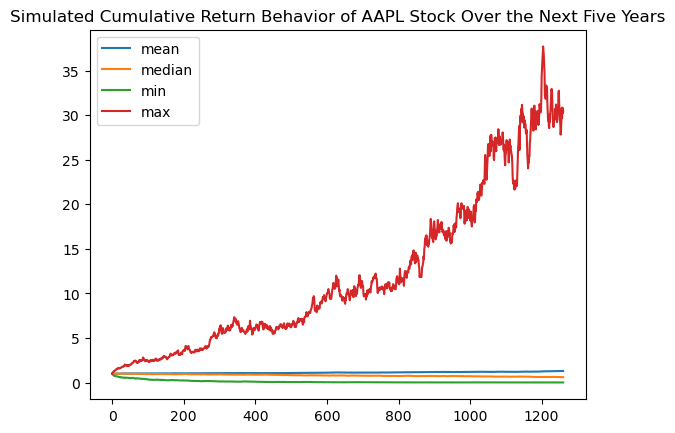

In [340]:
# Use the `plot` function to visually analyze AAPL cumulative returns over the next five years
# (Plot both mean and median forecasted cumulative return)
aapl_df_simulated_returns[['mean', 'median','min','max']].plot(title="Simulated Cumulative Return Behavior of AAPL Stock Over the Next Five Years")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `AAPL` Over the Next Five Years

In [299]:
# Set initial investment
aapl_initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
aapl_cumulative_pnl = aapl_initial_investment * aapl_df_simulated_returns

# Display sample data
aapl_cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10005.052128,10014.511157,8884.317335,11005.599923
2,10011.098852,10020.842275,8667.409242,11507.315500
3,10030.827400,10017.860499,8256.887234,12185.190056
4,10033.376135,10038.983296,7992.834201,12546.172586


### Plot the Simulated Profits/Losses of $10,000 Investment in `AAPL` Over the Next Five Years 

<Axes: title={'center': 'Simulated Outcomes Behavior of AAPL Stock Over the Next Year'}>

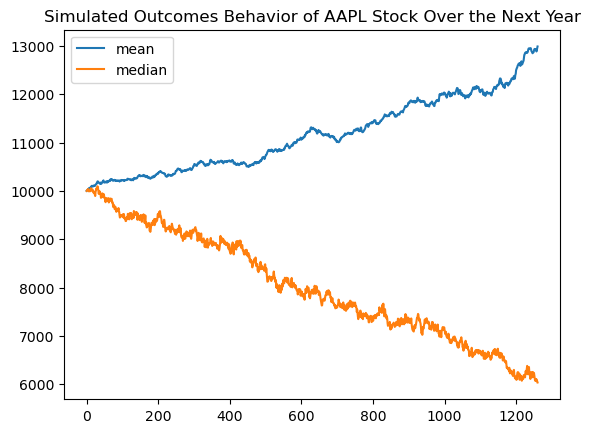

In [342]:
# Use the 'plot' function to create a chart of the simulated profits/losses
aapl_cumulative_pnl[['mean','median']].plot(title="Simulated Outcomes Behavior of AAPL Stock Over the Next Year")

### Calculate the range of the possible outcomes of our $10,000 investments in `AAPL` stocks

In [301]:
# Fetch summary statistics from the Monte Carlo simulation results
# Hint: Use the `summarize_cumulative_return` function
aapl_tbl = MC_AAPL.summarize_cumulative_return()

# Print summary statistics
print(aapl_tbl)



count           1000.000000
mean               1.298896
std                2.553344
min                0.007425
25%                0.267834
50%                0.603518
75%                1.337829
max               30.415180
95% CI Lower       0.054242
95% CI Upper       6.073142
Name: 1260, dtype: float64


In [302]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
aapl_ci_lower = round(aapl_tbl[8]*10000,2)
aapl_ci_upper = round(aapl_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in AAPL"
      f" over the next five years will end within in the range of"
      f" ${aapl_ci_lower} and ${aapl_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in AAPL over the next five years will end within in the range of $542.42 and $60731.42.


## S&P 500 Index 

In [303]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes for last year.
start = pd.Timestamp("2020-07-1", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-07-1", tz="America/New_York").isoformat()

# Set the ticker information=
tickers = "SPY"

# Get 3 year's worth of historical price data
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
spy_df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start,
    end=end
).df


# Display sample data
spy_df_ticker.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-07-01 04:00:00+00:00,309.54,311.89,309.07,310.57,72474858,418495,310.486119
2020-07-02 04:00:00+00:00,314.24,315.70,311.51,312.19,69344217,433527,313.315661
2020-07-06 04:00:00+00:00,316.37,317.68,315.56,317.01,61713828,331248,316.169274
2020-07-07 04:00:00+00:00,315.38,317.52,313.37,313.77,82909978,398769,315.437016
2020-07-08 04:00:00+00:00,314.61,316.30,312.70,316.16,54638669,325899,314.892715


In [304]:
# Reorganize the DataFrame
spy_df_ticker = pd.concat([spy_df_ticker], axis=1, keys=["SPY"])

# Display sample data
spy_df_ticker.head()


SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2020-07-01 04:00:00+00:00  309.54  311.89  309.07  310.57  72474858   
2020-07-02 04:00:00+00:00  314.24  315.70  311.51  312.19  69344217   
2020-07-06 04:00:00+00:00  316.37  317.68  315.56  317.01  61713828   
2020-07-07 04:00:00+00:00  315.38  317.52  313.37  313.77  82909978   
2020-07-08 04:00:00+00:00  314.61  316.30  312.70  316.16  54638669   

                                                   
                          trade_count        vwap  
timestamp                                          
2020-07-01 04:00:00+00:00      418495  310.486119  
2020-07-02 04:00:00+00:00      433527  313.315661  
2020-07-06 04:00:00+00:00      331248  316.169274  
2020-07-07 04:00:00+00:00      398769  315.437016  
2020-07-08 04:00:00+00:00      325899  314.892715

In [305]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
MC_SPY = MCSimulation(
    portfolio_data = spy_df_ticker,
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [306]:
# Run Monte Carlo simulations to forecast five years daily returns
MC_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997727,1.001437,1.004207,1.008078,0.996126,0.999953,1.002381,1.007450,0.992257,1.014179,...,1.023713,1.002365,1.008660,1.016257,1.002855,1.011269,0.991972,1.005059,1.021545,0.990818
2,1.009976,1.010225,1.019404,1.003522,0.990704,0.991005,1.012877,1.013277,0.996329,1.011199,...,1.022364,0.998329,1.003362,1.029373,1.020207,1.026715,1.011738,1.001660,1.025943,0.979152
3,1.022194,1.017096,1.031594,1.011665,0.979385,1.011480,0.993065,1.026566,0.994921,1.027356,...,1.023496,1.015301,1.003715,1.036211,1.019414,1.025956,1.000861,0.982582,1.026945,0.977051
4,1.020173,1.031961,1.028109,1.009171,0.972874,1.026900,1.020648,1.008600,0.992983,1.012140,...,1.037019,0.996299,1.003329,1.043822,1.028156,1.034476,1.009818,0.978600,1.018652,0.964556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.893656,2.677509,1.298676,2.924769,2.379135,2.218084,1.086474,1.768742,2.255627,1.383036,...,1.481031,2.837041,0.625944,1.181267,1.767008,3.084105,1.398083,1.393148,1.296366,2.831930
1257,1.861439,2.651623,1.302264,2.892758,2.368396,2.231196,1.103073,1.757791,2.251037,1.398620,...,1.513377,2.815064,0.629622,1.170534,1.768185,3.133340,1.412690,1.389328,1.297331,2.915339
1258,1.868342,2.684968,1.338457,2.946041,2.368004,2.268437,1.123051,1.737042,2.272155,1.391081,...,1.536249,2.811914,0.632616,1.183019,1.756242,3.156752,1.404421,1.396793,1.292974,2.930943
1259,1.874148,2.690723,1.322622,2.945336,2.423114,2.229470,1.128088,1.735827,2.283534,1.407886,...,1.565528,2.821719,0.633285,1.192954,1.739033,3.218448,1.422366,1.402366,1.322443,2.913286


In [309]:
# Compute summary statistics from the simulated daily returns
spy_simulated_returns_data = {
    "mean": list(MC_SPY.simulated_return.mean(axis=1)),
    "median": list(MC_SPY.simulated_return.median(axis=1)),
    "min": list(MC_SPY.simulated_return.min(axis=1)),
    "max": list(MC_SPY.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
spy_df_simulated_returns = pd.DataFrame(spy_simulated_returns_data)

# Display sample data
spy_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000642,1.000790,0.962741,1.033326
2,1.001508,1.001523,0.948224,1.049727
3,1.002084,1.001354,0.937818,1.059476
4,1.002647,1.002391,0.918587,1.073212


### Plot the Simulated Cumulative Return Trajectory for `SPY` over the Next Five Years

#### Use just the `mean` and `median` forecasts.

<Axes: title={'center': 'Simulated Cumulative Return Behavior of SPY Stock Over the Next Five Years'}>

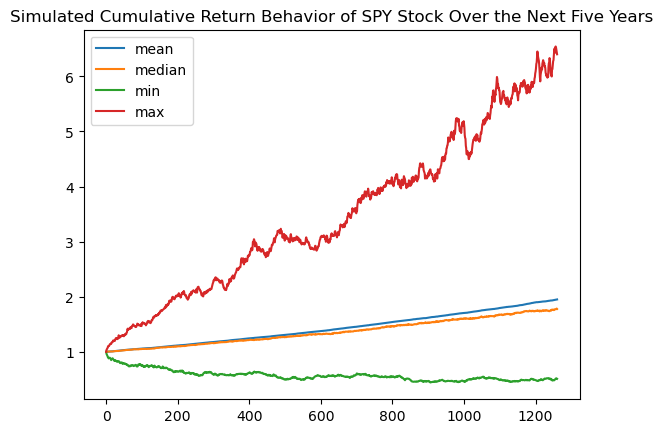

In [324]:
# Use the `plot` function to visually analyze AAPL cumulative returns over the next five years
# (Plot both mean and median forecasted cumulative return)
spy_df_simulated_returns[['mean', 'median','min','max']].plot(title="Simulated Cumulative Return Behavior of SPY Stock Over the Next Five Years")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `SPY` Over the Next Five Years

In [311]:
# Set initial investment
spy_initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
spy_cumulative_pnl = spy_initial_investment * spy_df_simulated_returns

# Display sample data
spy_cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10006.417007,10007.898213,9627.412205,10333.258768
2,10015.082241,10015.233086,9482.236187,10497.266234
3,10020.841452,10013.544975,9378.181410,10594.755319
4,10026.465044,10023.907957,9185.872401,10732.115776


<Axes: title={'center': 'Simulated Outcomes Behavior of SPY Stock Over the Next Five Years'}>

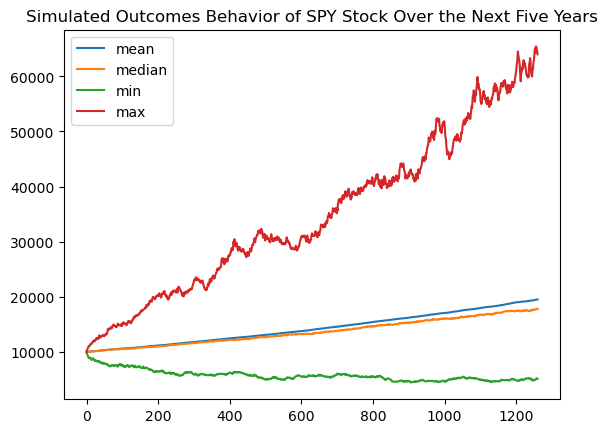

In [322]:
# Use the 'plot' function to create a chart of the simulated profits/losses
spy_cumulative_pnl[['mean','median','min','max']].plot(title="Simulated Outcomes Behavior of SPY Stock Over the Next Five Years")

### Calculate the range of the possible outcomes of our $10,000 investments in `SPY` stocks

In [314]:
spy_tbl = MC_SPY.summarize_cumulative_return()

# Print summary statistics
print(spy_tbl)

count           1000.000000
mean               1.950915
std                0.840796
min                0.510338
25%                1.360016
50%                1.778189
75%                2.373228
max                6.401811
95% CI Lower       0.809562
95% CI Upper       4.094944
Name: 1260, dtype: float64


In [323]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investment in SPY
spy_ci_lower = round(spy_tbl[8]*10000,2)
spy_ci_upper = round(spy_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in SPY"
      f" over the next 5 years will end within in the range of"
      f" ${spy_ci_lower} and ${spy_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in SPY over the next 5 years will end within in the range of $8095.62 and $40949.44.


### Calculate Percentage Return on $10,000 Investment in SPY stock

In [343]:
spy_pct_rtn = ((spy_ci_upper - spy_initial_investment) / spy_initial_investment) * 100
spy_pct_rtn


309.49440000000004

In [338]:
print(f"The percentage return on the initial investment of $10,000 in SPY over the next 5 years is 309.49%.")

The percentage return on the initial investment of $10,000 in SPY over the next 5 years is 309.49%.


# Final Results 

In [321]:
print(f"There is a 95% chance that an initial investment of $10,000 in the EV portfolio over the next 5 years will end within in the range of $3347.38 and $160257.04.")
print(f"There is a 95% chance that an initial investment of $10,000 in the AI portfolio over the next 5 years will end within in the range of $4843.78 and $71806.25.")
print(f"There is a 95% chance that an initial investment of $10,000 in the MV portfolio over the next 5 years will end within in the range of $2489.05 and $62829.12.")
print(f"There is a 95% chance that an initial investment in TSLA of $10,000 in the portfolio over the next five years will end within the range of $54.1 and $121836.43.")
print(f"There is a 95% chance that an initial investment in LCID of $10,000 in the portfolio over the next five years will end within in the range of $64.16 and $264741.01.")
print(f"There is a 95% chance that an initial investment in F of $10,000 in the portfolio over the next five years will end within in the range of $7131.1 and $319967.27.")
print(f"There is a 95% chance that an initial investment of $10,000 in MSFT over the next five years will end within in the range of $5855.06 and $82914.39.")
print(f"There is a 95% chance that an initial investment of $10,000 in GOOG over the next year will end within in the range of $129.5 and $45611.69.")
print(f"There is a 95% chance that an initial investment of $10,000 in NVDA over the next five years will end within in the range of $1026.41 and $411004.35.")
print(f"There is a 95% chance that an initial investment of $10,000 in META over the next five years will end within in the range of $1925.68 and $140161.4.")
print(f"There is a 95% chance that an initial investment of $10,000 in RBLX over the five next years will end within in the range of $54.39 and $133398.93.")
print(f"There is a 95% chance that an initial investment of $10,000 in AAPL over the next five years will end within in the range of $542.42 and $60731.42.")
print(f"There is a 95% chance that an initial investment of $10,000 in SPY over the next 5 years will end within in the range of $8095.62 and $40949.44.")

There is a 95% chance that an initial investment of $10,000 in the EV portfolio over the next 5 years will end within in the range of $3347.38 and $160257.04.
There is a 95% chance that an initial investment of $10,000 in the AI portfolio over the next 5 years will end within in the range of $4843.78 and $71806.25.
There is a 95% chance that an initial investment of $10,000 in the MV portfolio over the next 5 years will end within in the range of $2489.05 and $62829.12.
There is a 95% chance that an initial investment in TSLA of $10,000 in the portfolio over the next five years will end within the range of $54.1 and $121836.43.
There is a 95% chance that an initial investment in LCID of $10,000 in the portfolio over the next five years will end within in the range of $64.16 and $264741.01.
There is a 95% chance that an initial investment in F of $10,000 in the portfolio over the next five years will end within in the range of $7131.1 and $319967.27.
There is a 95% chance that an initia